## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.cluster.vq import kmeans, vq

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:
nacdata = pd.read_csv("C:/Users/artjo/OneDrive/Dokumenti/GitHub/Year 1/2023-24b-fai1-adsai-ArtjomMusaelans234535/DataLab/Week 3/NAC Data/2022_2023/NAC_Data.csv")

## Data Management and Understanding

### Inspecting a DataFrame
To get started with a new DataFrame, the first thing I need to do is explore it and see what it contains.

In [3]:
# Print the head of the nacdata data
print(nacdata.head())

        Player          Team Team within selected timeframe       Position  \
0    S. Baidoo      Salzburg                      Liefering       RCB, LCB   
1     M. Seidl    Rapid Wien                 Blau-Weiß Linz  LWF, RWF, AMF   
2      B. Okoh      Salzburg                      Liefering       LCB, RCB   
3  B. Koumetio  Austria Wien                Austria Wien II            LCB   
4   M. Polster  Austria Wien                Austria Wien II       LB, LAMF   

    Age  Market value Contract expires  Matches played  Minutes played  Goals  \
0  19.0       1000000       2027-06-30              21            1986      1   
1  22.0       1000000       2024-06-30              26            2293     12   
2  20.0       1000000       2025-06-30               8             476      0   
3  20.0        600000       2025-06-30               4             389      0   
4  20.0        600000       2025-06-30               5             464      1   

   ...  Exits per 90  Aerial duels per 90.1 

In [4]:
# Print information about nacdata
print(nacdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16535 entries, 0 to 16534
Columns: 116 entries, Player to Scaled_Weight
dtypes: float64(91), int64(16), object(9)
memory usage: 14.6+ MB
None


In [5]:
# Print the shape of nacdata
print(nacdata.shape)

(16535, 116)


In [6]:
# Print a description of nacdata
print(nacdata.describe())

                Age  Market value  Matches played  Minutes played  \
count  16527.000000  1.653500e+04    16535.000000    16535.000000   
mean      25.233860  5.086069e+05       20.856728     1485.484366   
std        4.636223  1.400836e+06        9.196324      862.646123   
min       15.000000  0.000000e+00        1.000000        1.000000   
25%       22.000000  1.000000e+05       14.000000      750.000000   
50%       25.000000  2.250000e+05       21.000000     1387.000000   
75%       29.000000  4.500000e+05       28.000000     2115.000000   
max       42.000000  6.000000e+07       45.000000     4491.000000   

              Goals            xG       Assists            xA  Duels per 90  \
count  16535.000000  16535.000000  16535.000000  16535.000000  16303.000000   
mean       1.801270      1.894612      1.057938      1.120116     17.882890   
std        2.841558      2.546904      1.614964      1.429221      7.253739   
min        0.000000      0.000000      0.000000      0.000000 

In [7]:
# Print the values of nacdata
print(nacdata.values)

[['S. Baidoo' 'Salzburg' 'Liefering' ... 0.0 0.4344537576581386
  0.1666666666666666]
 ['M. Seidl' 'Rapid Wien' 'Blau-Weiß Linz' ... 0.0 0.2510205953026112
  -0.5]
 ['B. Okoh' 'Salzburg' 'Liefering' ... 0.0 0.46780524172278
  1.4166666666666667]
 ...
 ['A. Al-Hamawi' 'Helsingborg' 'Helsingborg' ... 0.0 0.3343993054642146
  0.25]
 ['L. Kjellnäs' 'Helsingborgs U21' 'Helsingborg' ... 0.0
  -2.6672342603535064 -6.166666666666667]
 ['S. Bengtsson' 'Helsingborg' 'Helsingborg' ... 0.0 -2.6672342603535064
  -6.166666666666667]]


In [8]:
# Print the column index of nacdata
print(nacdata.columns)

Index(['Player', 'Team', 'Team within selected timeframe', 'Position', 'Age',
       'Market value', 'Contract expires', 'Matches played', 'Minutes played',
       'Goals',
       ...
       'Exits per 90', 'Aerial duels per 90.1', 'Free kicks per 90',
       'Direct free kicks per 90', 'Direct free kicks on target, %',
       'Corners per 90', 'Penalties taken', 'Penalty conversion, %',
       'Scaled_Height', 'Scaled_Weight'],
      dtype='object', length=116)


In [9]:
# Print the row index of nacdata
print(nacdata.index)

RangeIndex(start=0, stop=16535, step=1)


In [10]:
nacdata

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Scaled_Height,Scaled_Weight
0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",19.0,1000000,2027-06-30,21,1986,1,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,0.434454,0.166667
1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",22.0,1000000,2024-06-30,26,2293,12,...,NaN,NaN,0.39,0.31,0.0,0.12,0,0.0,0.251021,-0.500000
2,B. Okoh,Salzburg,Liefering,"LCB, RCB",20.0,1000000,2025-06-30,8,476,0,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,0.467805,1.416667
3,B. Koumetio,Austria Wien,Austria Wien II,LCB,20.0,600000,2025-06-30,4,389,0,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,0.584535,0.583333
4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",20.0,600000,2025-06-30,5,464,1,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,0.384427,-0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16530,I. Shamoun,Eskilstuna,Eskilstuna,"LCMF, RCMF, LDMF",20.0,0,NaN,20,903,0,...,NaN,NaN,1.00,0.10,0.0,1.30,0,0.0,0.251021,-0.750000
16531,Z. Fryers,Eskilstuna,Eskilstuna,"LB, LCB",30.0,0,2023-12-31,15,969,0,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,0.417778,0.500000
16532,A. Al-Hamawi,Helsingborg,Helsingborg,"CF, LWF, LW",19.0,0,NaN,21,1588,4,...,NaN,NaN,0.28,0.28,20.0,0.00,0,0.0,0.334399,0.250000
16533,L. Kjellnäs,Helsingborgs U21,Helsingborg,"LCMF, RCMF, LW",19.0,0,NaN,9,442,0,...,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0,-2.667234,-6.166667


### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

#### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times.

In [11]:
# This function displays how many times each player's name appears twice.
Num_of_duplicated_players = nacdata.duplicated(subset=["Player"]).sum()
print(f'Number of duplicated names : {Num_of_duplicated_players}')

Number of duplicated names : 804


In [12]:
# This function displays the quantity of identical players by name, team, country of birth, and age.
Num_of_duplicated_players_2 = nacdata.duplicated(subset=["Player", "Team", "Birth country", "Age"]).sum()
print(f'Number of duplicated players by name, team, birth country and age : {Num_of_duplicated_players_2}')

Number of duplicated players by name, team, birth country and age : 250


In [13]:
# This function removes all player duplicates based on their name, team, country of birth, and age.
nacdata_drop_duplicates = nacdata.drop_duplicates(subset=["Player", "Team", "Birth country", "Age"])
print(nacdata_drop_duplicates.head())

        Player          Team Team within selected timeframe       Position  \
0    S. Baidoo      Salzburg                      Liefering       RCB, LCB   
1     M. Seidl    Rapid Wien                 Blau-Weiß Linz  LWF, RWF, AMF   
2      B. Okoh      Salzburg                      Liefering       LCB, RCB   
3  B. Koumetio  Austria Wien                Austria Wien II            LCB   
4   M. Polster  Austria Wien                Austria Wien II       LB, LAMF   

    Age  Market value Contract expires  Matches played  Minutes played  Goals  \
0  19.0       1000000       2027-06-30              21            1986      1   
1  22.0       1000000       2024-06-30              26            2293     12   
2  20.0       1000000       2025-06-30               8             476      0   
3  20.0        600000       2025-06-30               4             389      0   
4  20.0        600000       2025-06-30               5             464      1   

   ...  Exits per 90  Aerial duels per 90.1 

In [14]:
# Count the players in each age group and arrange them according to age
age_counts = nacdata_drop_duplicates["Age"].value_counts().sort_index()
print(age_counts)

Age
15.0       4
16.0      32
17.0     142
18.0     406
19.0     901
20.0    1290
21.0    1161
22.0    1377
23.0    1400
24.0    1265
25.0    1197
26.0    1141
27.0     987
28.0     869
29.0     885
30.0     714
31.0     666
32.0     562
33.0     433
34.0     339
35.0     198
36.0     140
37.0      80
38.0      42
39.0      21
40.0      13
41.0      10
42.0       2
Name: count, dtype: int64


In [15]:
# Filter the DataFrame so that only players who are at least 18 years old remain.
remove_players_below_age = nacdata_drop_duplicates[nacdata_drop_duplicates["Age"] >= 18]

# Checking the updated list of players for age
age_counts = remove_players_below_age["Age"].value_counts().sort_index()
print(age_counts)

Age
18.0     406
19.0     901
20.0    1290
21.0    1161
22.0    1377
23.0    1400
24.0    1265
25.0    1197
26.0    1141
27.0     987
28.0     869
29.0     885
30.0     714
31.0     666
32.0     562
33.0     433
34.0     339
35.0     198
36.0     140
37.0      80
38.0      42
39.0      21
40.0      13
41.0      10
42.0       2
Name: count, dtype: int64


#### Filling null values 
Filling null values refers to the process of replacing or imputing missing or null values in a dataset with some predefined values. When working with data, it's common to encounter missing values in certain columns, and handling them appropriately is crucial for accurate analysis and modeling.

In [16]:
# It will highlight areas of the dataset that are marked as "True," indicating that the values in that specific cell are null.
print(remove_players_below_age.isnull())

       Player   Team  Team within selected timeframe  Position    Age  \
0       False  False                           False     False  False   
1       False  False                           False     False  False   
2       False  False                           False     False  False   
3       False  False                           False     False  False   
4       False  False                           False     False  False   
...       ...    ...                             ...       ...    ...   
16530   False  False                           False     False  False   
16531   False  False                           False     False  False   
16532   False  False                           False     False  False   
16533   False  False                           False     False  False   
16534   False  False                           False     False  False   

       Market value  Contract expires  Matches played  Minutes played  Goals  \
0             False             False      

In [17]:
# This function indicates the number of null values in each column.
remove_players_below_age.isnull().sum()

Player                              0
Team                              621
Team within selected timeframe      0
Position                           53
Age                                 0
                                 ... 
Corners per 90                    180
Penalties taken                     0
Penalty conversion, %               0
Scaled_Height                       0
Scaled_Weight                       0
Length: 116, dtype: int64

In [18]:
# This code generates a series called missing_values_by_column, which returns True or False depending on if a column has at least one missing value. 
# Only the columns with missing values are chosen using the index.
missing_values_by_column = remove_players_below_age.isnull().any()

# Print columns with missing values
columns_with_missing_values = missing_values_by_column[missing_values_by_column].index
print(columns_with_missing_values)


Index(['Team', 'Position', 'Contract expires', 'Duels per 90', 'Duels won, %',
       'Birth country', 'Passport country', 'Foot',
       'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'Sliding tackles per 90', 'Shots blocked per 90',
       'Interceptions per 90', 'Fouls per 90', 'Yellow cards per 90',
       'Red cards per 90', 'Successful attacking actions per 90',
       'Goals per 90', 'Non-penalty goals per 90', 'xG per 90',
       'Head goals per 90', 'Shots per 90', 'Shots on target, %',
       'Assists per 90', 'Crosses per 90', 'Accurate crosses, %',
       'Crosses from left flank per 90', 'Accurate crosses from left flank, %',
       'Crosses from right flank per 90',
       'Accurate crosses from right flank, %', 'Crosses to goalie box per 90',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Offensive duels won, %', 'Touches in box p

In [19]:
# The whole DataFrame is subjected to the fillna(0) technique, which substitutes 0 for each NaN value.
df2 = remove_players_below_age.fillna(value=0)

In [20]:
# Determine which columns' values are shown as floating points and integers.
numeric_columns = df2.select_dtypes(include=['int', 'float']).columns

# Replace zeros temporarily with np.nan 
dataframe_no_zeros = df2.replace(0, np.nan)

# Compute the average values without include the NaN values.
column_means = dataframe_no_zeros[numeric_columns].mean(skipna=True)

# Replace zeros with averages, excluding zeros when calculating the average
dataframe_filled = df2.copy()
dataframe_filled[numeric_columns] = dataframe_filled[numeric_columns].apply(lambda col: col.replace(0, column_means[col.name]))

In [21]:
# Check the data type in the first 10 columns
types_of_first_10_columns = dataframe_filled.iloc[:, :10].dtypes
print(types_of_first_10_columns)

Player                             object
Team                               object
Team within selected timeframe     object
Position                           object
Age                               float64
Market value                      float64
Contract expires                   object
Matches played                      int64
Minutes played                      int64
Goals                             float64
dtype: object


In [22]:
# Find the rows that have the value "0" in at least one column of data type "object."
rows_to_remove = dataframe_filled[dataframe_filled.select_dtypes(include='object').applymap(lambda x: str(x) == '0').any(axis=1)].index

# Remove rows having at least one 'object' data type column that has the value '0' in it.
df_cleaned = dataframe_filled.drop(index=rows_to_remove)

In [23]:
# Check the DataFrame
print(df_cleaned.head(10))
df_cleaned

          Player          Team Team within selected timeframe       Position  \
0      S. Baidoo      Salzburg                      Liefering       RCB, LCB   
1       M. Seidl    Rapid Wien                 Blau-Weiß Linz  LWF, RWF, AMF   
2        B. Okoh      Salzburg                      Liefering       LCB, RCB   
3    B. Koumetio  Austria Wien                Austria Wien II            LCB   
4     M. Polster  Austria Wien                Austria Wien II       LB, LAMF   
5        D. Oroz       Vitesse                  Sturm Graz II            RCB   
6      O. Strunz    Rapid Wien                  Rapid Wien II  RAMF, RWF, RW   
7        C. Lang      Hartberg                  Sturm Graz II        CF, AMF   
8   N. Geyrhofer    Sturm Graz                  Sturm Graz II            RCB   
10   S. Kapsamer     Amstetten                      Amstetten    LW, LB, LWB   

     Age  Market value Contract expires  Matches played  Minutes played  \
0   19.0     1000000.0       2027-06-30     

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Scaled_Height,Scaled_Weight
0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",19.0,1000000.000000,2027-06-30,21,1986,1.000000,...,1.494944,0.464188,0.541697,0.178152,54.326371,1.056815,2.000581,88.990478,0.434454,0.166667
1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",22.0,1000000.000000,2024-06-30,26,2293,12.000000,...,1.494944,0.464188,0.390000,0.310000,54.326371,0.120000,2.000581,88.990478,0.251021,-0.500000
2,B. Okoh,Salzburg,Liefering,"LCB, RCB",20.0,1000000.000000,2025-06-30,8,476,3.240663,...,1.494944,0.464188,0.541697,0.178152,54.326371,1.056815,2.000581,88.990478,0.467805,1.416667
3,B. Koumetio,Austria Wien,Austria Wien II,LCB,20.0,600000.000000,2025-06-30,4,389,3.240663,...,1.494944,0.464188,0.541697,0.178152,54.326371,1.056815,2.000581,88.990478,0.584535,0.583333
4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",20.0,600000.000000,2025-06-30,5,464,1.000000,...,1.494944,0.464188,0.541697,0.178152,54.326371,1.056815,2.000581,88.990478,0.384427,-0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16475,M. Mitku,Eskilstuna,Eskilstuna,"RW, AMF, CF",22.0,25000.000000,2026-12-31,11,303,3.240663,...,1.494944,0.464188,0.541697,0.178152,54.326371,0.890000,2.000581,88.990478,0.284372,-0.833333
16477,M. Widell,Landskrona,Landskrona,"RCMF, LCMF",21.0,604813.956909,2026-12-31,14,1359,1.000000,...,1.494944,0.464188,1.060000,0.130000,50.000000,2.850000,2.000581,88.990478,0.351075,-0.416667
16489,S. Karlsson Grach,Östersunds FK,Östersunds FK,CF,22.0,604813.956909,2023-12-31,21,936,5.000000,...,1.494944,0.464188,0.541697,0.178152,54.326371,1.056815,2.000581,88.990478,-2.667234,-6.166667
16491,M. Musolytyn,Östersunds FK,Östersunds FK,"LW, RW, LCMF",24.0,604813.956909,2024-12-31,17,876,3.240663,...,1.494944,0.464188,0.820000,0.178152,54.326371,0.620000,2.000581,88.990478,0.284372,-0.583333


### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

In [24]:
# Create a copy of DataFrame 
NacData_EDA = df_cleaned.copy()

#### How many numerical variables are present?

In [25]:
numerical_variables = NacData_EDA.select_dtypes(include=['float64', 'int64']).columns
print(f'Numerical Variables: {len(numerical_variables)}')

Numerical Variables: 107


#### How many categorical variables are present?

In [26]:
categorical_variables = NacData_EDA.select_dtypes(include=['object']).columns
print(f'Categorical Variables: {len(categorical_variables)}')

Categorical Variables: 9


#### Are there any missing values present in any of the columns of data? If so, how will you handle the missing values?

In [27]:
missing_values = NacData_EDA.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Player                            0
Team                              0
Team within selected timeframe    0
Position                          0
Age                               0
                                 ..
Corners per 90                    0
Penalties taken                   0
Penalty conversion, %             0
Scaled_Height                     0
Scaled_Weight                     0
Length: 116, dtype: int64


#### Are there any duplicate rows present in the dataset? If so, how did you handle it?

In [28]:
duplicate_rows = NacData_EDA[NacData_EDA.duplicated()]
print(f'Duplicate Rows: {len(duplicate_rows)}')

Duplicate Rows: 0


#### Is each column in the dataset stored in the appropriate numeric format?

In [29]:
print('Data Types:')
print(NacData_EDA.dtypes)

Data Types:
Player                             object
Team                               object
Team within selected timeframe     object
Position                           object
Age                               float64
                                   ...   
Corners per 90                    float64
Penalties taken                   float64
Penalty conversion, %             float64
Scaled_Height                     float64
Scaled_Weight                     float64
Length: 116, dtype: object


#### What is the range of Market Value of the players?

In [30]:
market_value_range = NacData_EDA['Market value'].describe()[['min', 'max']]
print(f'Market Value Range: {market_value_range}')

Market Value Range: min       10000.0
max    60000000.0
Name: Market value, dtype: float64


#### Identify the country of the youngest player in the dataset

In [31]:
youngest_players = NacData_EDA[NacData_EDA['Age'] == NacData_EDA['Age'].min()]
unique_countries_youngest = youngest_players['Birth country'].unique()

print(f'Country of the Youngest Player: {unique_countries_youngest}')

Country of the Youngest Player: ['Austria' 'Norway' 'Belgium' 'Hungary' 'Finland' 'United States'
 'Ecuador' 'Netherlands' 'Bulgaria' 'Belarus' 'Cyprus' 'Denmark' 'Iceland'
 'France' 'Italy' 'Germany' 'Guinea' 'Luxembourg' 'Poland' "Côte d'Ivoire"
 'Latvia' 'Portugal' 'Slovenia' 'Spain' 'Sweden']


#### What is the average age of players in the dataset?

In [32]:
average_age = NacData_EDA['Age'].mean()
print(f"Average Age of Players: {average_age:.2f} years")

Average Age of Players: 25.57 years


#### Which team has the highest market value on average?

In [33]:
team_market_value = NacData_EDA.groupby('Team')['Market value'].mean().idxmax()
print(f"Team with the Highest Average Market Value: {team_market_value}")

Team with the Highest Average Market Value: Liverpool


#### How does the market value of players correlate with their age?

In [34]:
correlation = NacData_EDA['Market value'].corr(NacData_EDA['Age'])
print(f"Correlation between Market Value and Age: {correlation:.2f}")

Correlation between Market Value and Age: -0.06


#### What is the distribution of players' positions across different teams?
As you can see, when I made the graph (which is located in the visualisations section below), the players on the RCMF, CF, and RWF teams had the greatest peak positions.

#### Which country has the highest representation in the dataset in terms of player birthplace?

In [35]:
top_country = NacData_EDA['Birth country'].value_counts().idxmax()
print(f"Country with Highest Representation in Birthplace: {top_country}")

Country with Highest Representation in Birthplace: Italy


#### Is there a correlation between a player's height and weight and the number of goals scored?

In [36]:
correlation_hw_goals = NacData_EDA[['Height', 'Weight', 'Goals']].corr()
print(correlation_hw_goals)

          Height    Weight     Goals
Height  1.000000  0.785256  0.001240
Weight  0.785256  1.000000  0.027637
Goals   0.001240  0.027637  1.000000


#### What is the average number of matches played by players in different age groups?

In [37]:
# To prevent changing the original data, make a duplicate of the DataFrame.
df_age_groups = NacData_EDA.copy()

# To group participants by age, use pd.cut to create a new column called "Age Group."
# The labels provide the names of the appropriate groups, while the designated bins establish the age intervals. 
# The right border of each interval is exclusive when right=False is set.

df_age_groups['Age Group'] = pd.cut(df_age_groups['Age'], bins=[20, 25, 30, 35, 40, 45, 50], labels=['20-24', '25-29', '30-34', '35-39', '40-44', '45-50'], right=False)

In [38]:
df_age_groups.groupby('Age Group')['Matches played'].mean()

Age Group
20-24    21.529476
25-29    22.885552
30-34    22.827992
35-39    23.146893
40-44    24.000000
45-50          NaN
Name: Matches played, dtype: float64

#### Which players have the highest ‘xG (Expected Goals)' value and how does it compare with actual goals scored?

In [39]:
#Identify the player who has scored the most goals in reality.
highest_goals_player = NacData_EDA.loc[NacData_EDA['Goals'].idxmax()]

# Display the results and compare the two players
print("Player with the highest actual goals:")
print(highest_goals_player[['Player', 'Goals']])

Player with the highest actual goals:
Player    H. Cuypers
Goals           27.0
Name: 639, dtype: object


In [40]:
#Identify the player whose projected goals are the highest (xG).
highest_xG_player = NacData_EDA.loc[NacData_EDA['xG'].idxmax()]

print("Player with the highest expected goals (xG):")
print(highest_xG_player[['Player', 'xG']])

Player with the highest expected goals (xG):
Player    M. Dugandžić
xG               23.23
Name: 14051, dtype: object


In [41]:
# Comparison between actual goals and expected goals
comparison = pd.DataFrame({
    'Player': [highest_goals_player['Player'], highest_xG_player['Player']],
    'Actual Goals': [highest_goals_player['Goals'], '-'],
    'Expected Goals (xG)': ['-', highest_xG_player['xG']]
})

print("Comparison between actual goals and expected goals:")
print(comparison)

Comparison between actual goals and expected goals:
         Player Actual Goals Expected Goals (xG)
0    H. Cuypers         27.0                   -
1  M. Dugandžić            -               23.23


#### Which players have the highest ‘Successful attacking actions per 90' and which position do they play?

In [42]:
NacData_EDA['Successful attacking actions per 90'].max()
NacData_EDA.groupby('Successful attacking actions per 90')['Player'].max().reset_index().sort_values(by='Successful attacking actions per 90', ascending=False).iloc[0]

Successful attacking actions per 90         15.95
Player                                 C. Madueke
Name: 748, dtype: object

In [43]:
NacData_EDA.groupby('Successful attacking actions per 90')['Position'].max().reset_index().sort_values(by='Successful attacking actions per 90', ascending=False).iloc[0]

Successful attacking actions per 90        15.95
Position                               RAMF, RWF
Name: 748, dtype: object

#### How do ‘Passes per 90' and ‘Accurate passes %' correlate for midfielders?

In [44]:
# To start, I'll divide each location throughout the whole dataset. 
df_corr_pass_acc = NacData_EDA[["Position", "Passes per 90", "Accurate passes, %"]].copy()
df_corr_pass_acc["Position"] = df_corr_pass_acc["Position"].str.split(', ')
df_copy_explode = df_corr_pass_acc.explode("Position")
df_copy_explode 

,Position,Passes per 90,"Accurate passes, %"
0,RCB,48.35,83.97
0,LCB,48.35,83.97
1,LWF,38.82,76.64
1,RWF,38.82,76.64
1,AMF,38.82,76.64
...,...,...,...
16491,LW,25.89,76.98
16491,RW,25.89,76.98
16491,LCMF,25.89,76.98
16531,LB,38.73,78.90


In [45]:
# Choose midfielders' data from the DataFrame by applying the "isin" condition.
midfielders_data = df_copy_explode[df_copy_explode['Position'].isin(['CM', 'CDM', 'CAM'])]

# Calculate the correlation between the number of passes per 90 minutes (Passes per 90) and the accuracy of passes (%) for midfielders
correlation_passes_accuracy = midfielders_data['Passes per 90'].corr(midfielders_data['Accurate passes, %'])

print(f"Correlation between Passes per 90 and Accurate Passes % for Midfielders: {correlation_passes_accuracy:.2f}")

Correlation between Passes per 90 and Accurate Passes % for Midfielders: nan


#### Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?

In [46]:
# Sort the DataFrame by 'Age Group' and determine the average 'Save rate, %' for every group.
df_age_groups.groupby('Age Group')['Save rate, %'].mean()

Age Group
20-24    68.649348
25-29    68.731082
30-34    68.753684
35-39    68.854870
40-44    70.415447
45-50          NaN
Name: Save rate, %, dtype: float64

#### Which players have the highest ‘Penalty conversion %' and what are their overall shooting statistics?

In [47]:
NacData_EDA['Penalty conversion, %'].max()
NacData_EDA.groupby('Penalty conversion, %')['Player'].max().reset_index().sort_values(by='Penalty conversion, %', ascending=False).iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

,"Penalty conversion, %",Player
16,100.000000,Е. Moses
15,88.990478,М. Sankoh
14,88.889000,O. Atzili
13,87.500000,M. Uzuni
12,85.714000,V. van Crooij
11,83.333000,Y. Begraoui
10,80.000000,S. Merkaj
9,77.778000,Josué
8,75.000000,Á. Henríquez
7,71.429000,W. Cheddira


### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

In [48]:
# Create a copy of DataFrame 
NacData_Visual = df_cleaned.copy()

#### How does the market value of players correlate with their age?

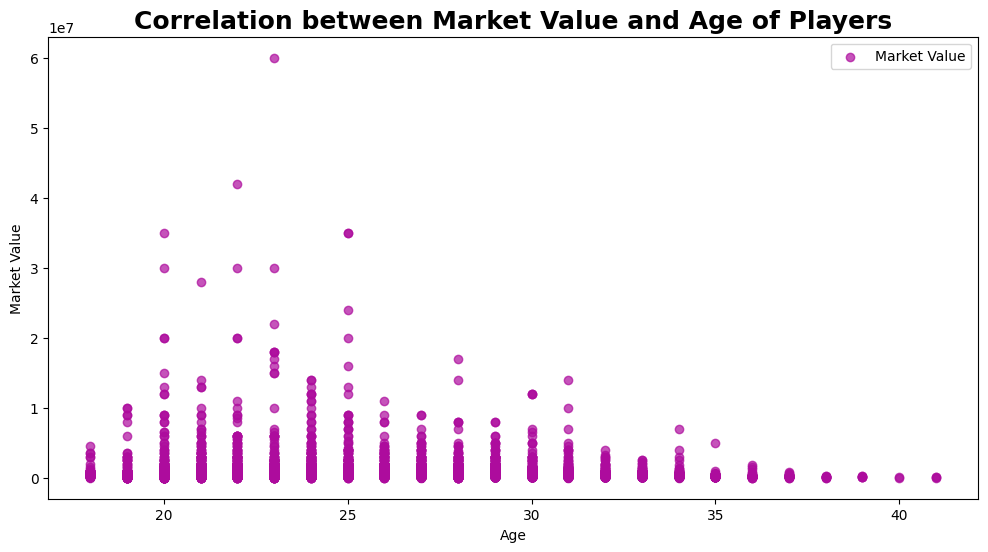

In [49]:
# For improved display, increase the x-axis's tick count.
plt.figure(figsize=(12, 6))

# Set title for the graph
plt.title('Correlation between Market Value and Age of Players', fontdict={'fontweight': 'bold', 'fontsize': 18})

# Plotting the correlation between Market Value and Age
plt.scatter(NacData_Visual['Age'], NacData_Visual['Market value'], label='Market Value', color='#ad0c9d', alpha=0.7)

# Adding labels for x and y axes
plt.xlabel('Age')
plt.ylabel('Market Value')

# Displaying a legend
plt.legend()

# Display the plot
plt.show()

#### What is the distribution of players' positions across different teams?

In [50]:
df_player_position = NacData_Visual.copy()
df_player_position["Position"] = df_player_position["Position"].str.split(', ')
# Split the list of positions and explode the DataFrame
df_player_position = df_player_position.explode('Position')

# Select the top N teams based on the number of players
top_teams = df_player_position['Team'].value_counts().nlargest(10).index
df_player_position_top = df_player_position[df_player_position['Team'].isin(top_teams)]

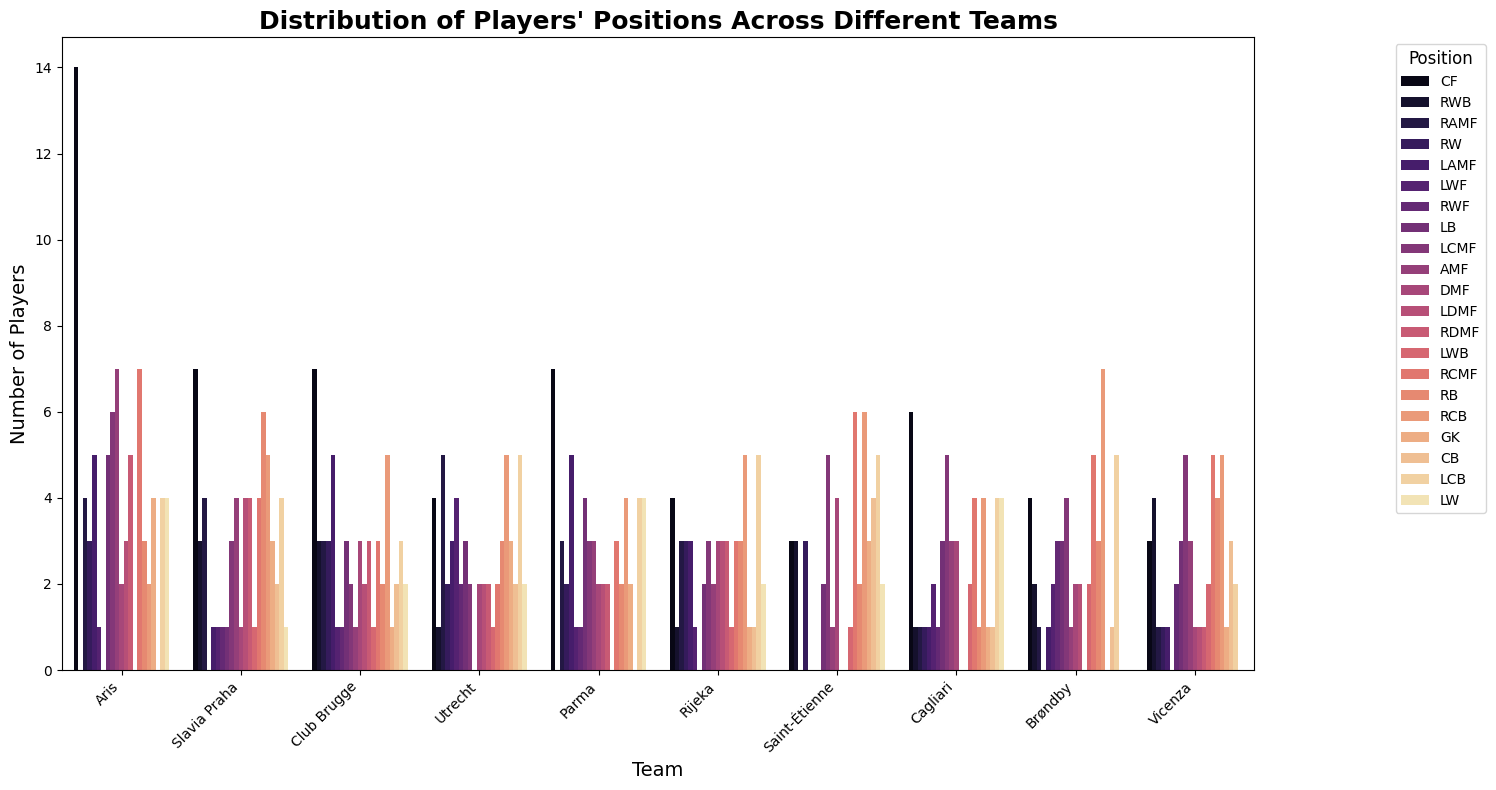

In [51]:
plt.figure(figsize=(15, 8))

# Create a bar plot to visualize the distribution of players' positions across different teams
sns.countplot(x='Team', hue='Position', data=df_player_position_top, palette='magma', order=df_player_position_top['Team'].value_counts().index)

# Set the title and labels
plt.title('Distribution of Players\' Positions Across Different Teams', fontsize=18, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Position', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.tight_layout()
plt.show()

#### Which country has the highest representation in the dataset in terms of player birthplace?

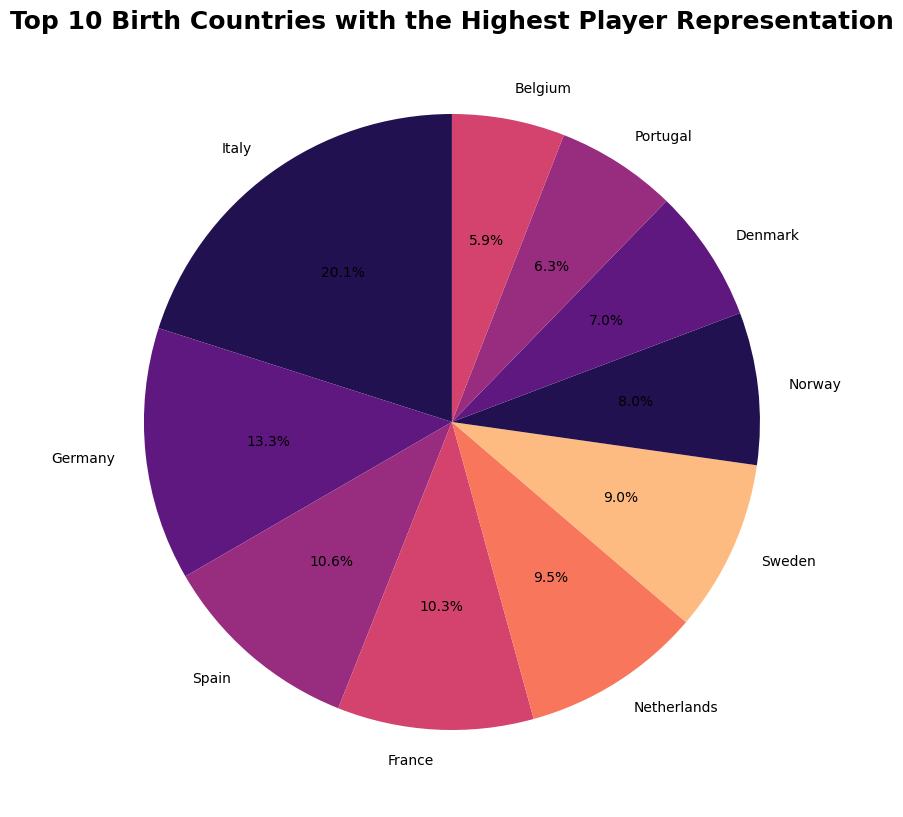

In [52]:
plt.figure(figsize=(10, 10))

# Count the number of players from each country
birthplace_counts = NacData_Visual['Birth country'].value_counts().nlargest(10)

# Plot a pie chart to visualize the representation of countries
plt.pie(birthplace_counts, labels=birthplace_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma'))

# Set the title
plt.title('Top 10 Birth Countries with the Highest Player Representation', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

#### Is there a correlation between a player's height and weight and the number of goals scored?

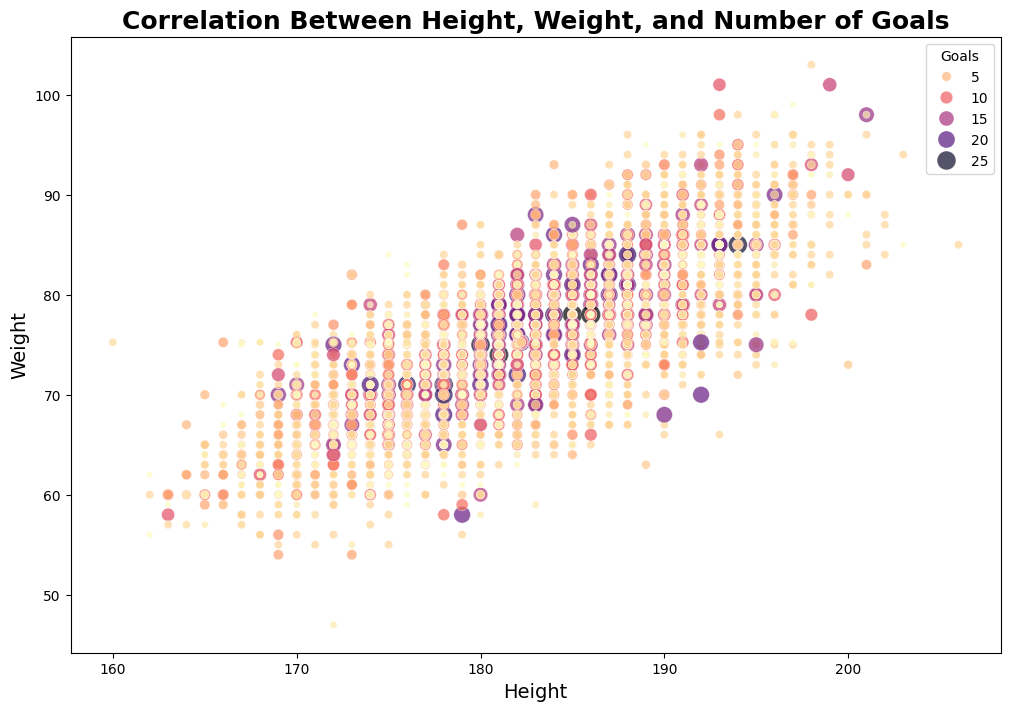

In [53]:
plt.figure(figsize=(12, 8))

# Create a scatter plot to visualize the correlation between height, weight, and number of goals
sns.scatterplot(x='Height', y='Weight', size='Goals', data=NacData_Visual, palette='magma_r', sizes=(20, 200), hue='Goals', alpha=0.7)

# Set the title and labels
plt.title('Correlation Between Height, Weight, and Number of Goals', fontsize=18, fontweight='bold')
plt.xlabel('Height', fontsize=14)
plt.ylabel('Weight', fontsize=14)

# Show the plot
plt.show()

In [54]:
# Displaying the correlation between height and weight
cor = NacData_Visual['Height'].corr(NacData_Visual['Weight'])

print(f"Correlation Between Height, Weight, and Number of Goals: {cor:.2f}")

Correlation Between Height, Weight, and Number of Goals: 0.79


#### How does the number of goals per player vary across different positions?

C:\Users\artjo\AppData\Local\Temp\ipykernel_37548\3353776627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Goals', data=df_player_position, palette='magma')


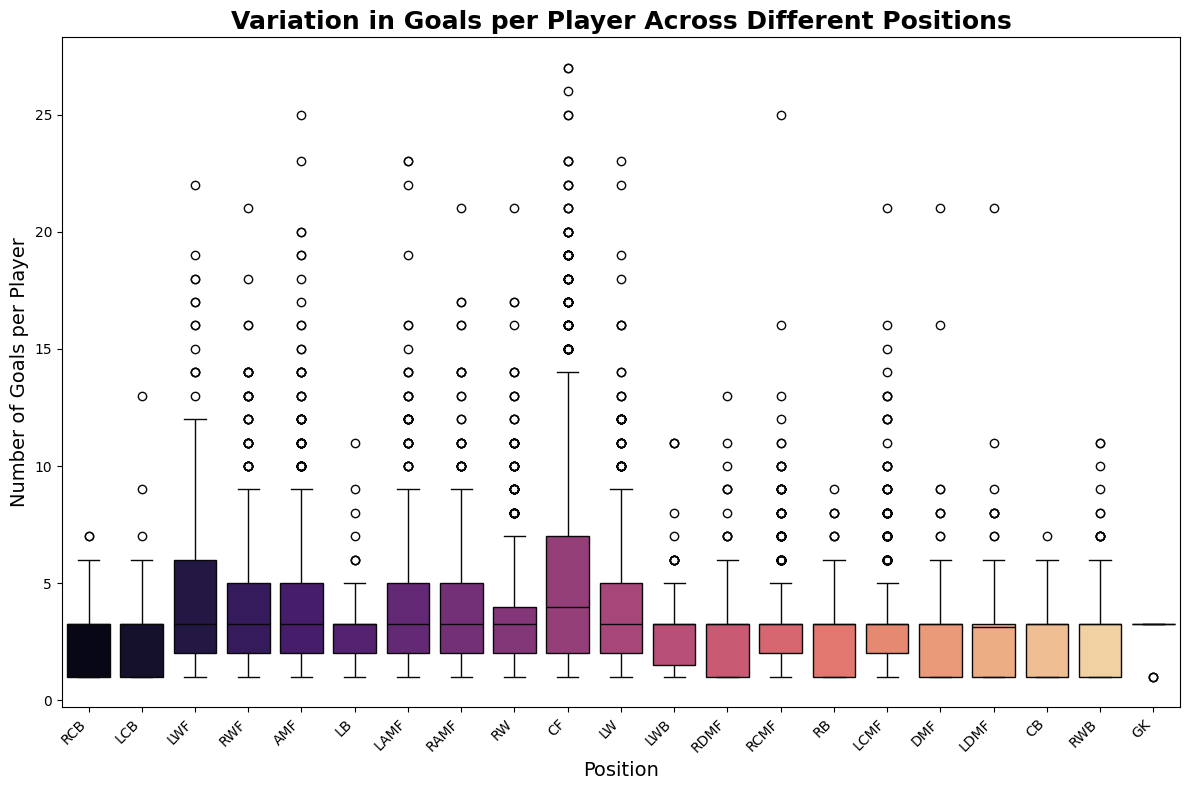

In [55]:
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the variation in the number of goals per player across different positions
sns.boxplot(x='Position', y='Goals', data=df_player_position, palette='magma')

# Set the title and labels
plt.title('Variation in Goals per Player Across Different Positions', fontsize=18, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Goals per Player', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### What is the average number of matches played by players in different age groups?

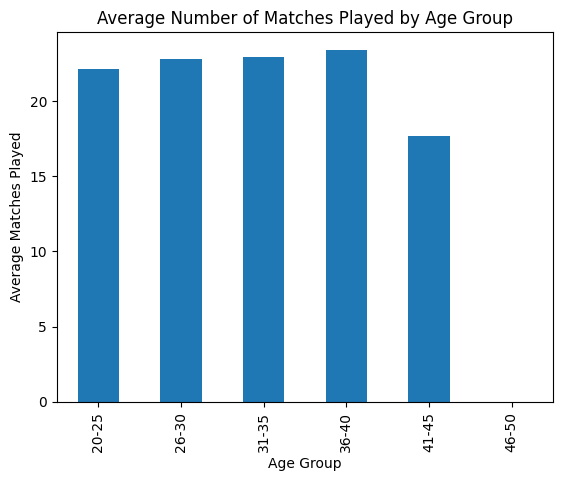

In [56]:
age_groups = pd.cut(NacData_Visual['Age'], bins=[20, 25, 30, 35, 40, 45, 50], labels=['20-25', '26-30', '31-35', '36-40', '41-45', '46-50'])
average_matches_by_age = NacData_Visual.groupby(age_groups)['Matches played'].mean()
average_matches_by_age.plot(kind='bar')

plt.title('Average Number of Matches Played by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Matches Played')
plt.show()

#### Which players have the highest ‘xG (Expected Goals)' value and how does it compare with actual goals scored?

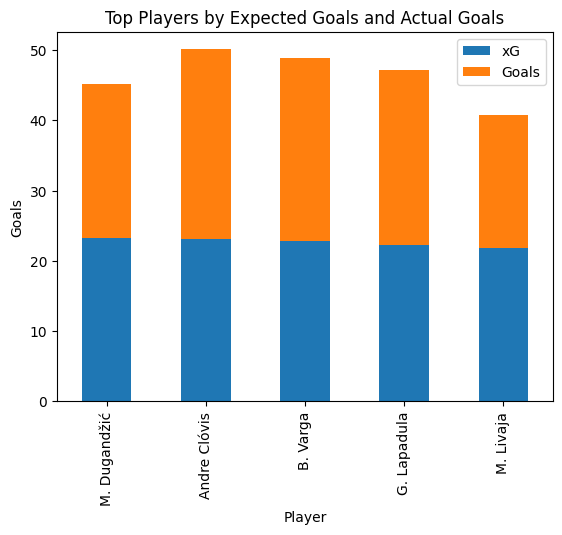

In [57]:
top_xg_players = NacData_Visual.nlargest(5, 'xG')
top_xg_players[['Player', 'xG', 'Goals']].plot(kind='bar', x='Player', stacked=True)
plt.title('Top Players by Expected Goals and Actual Goals')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.show()

#### How do ‘Duels won %' and ‘Aerial duels won %' vary by position?

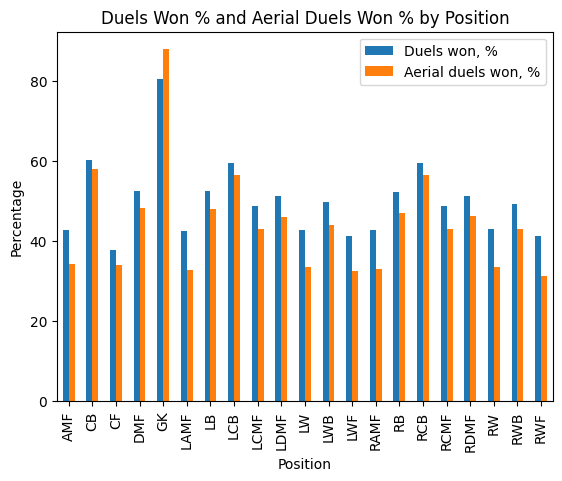

In [58]:
duels_aerials_by_position = df_player_position.groupby('Position')[['Duels won, %', 'Aerial duels won, %']].mean()
duels_aerials_by_position.plot(kind='bar')
plt.title('Duels Won % and Aerial Duels Won % by Position')
plt.xlabel('Position')
plt.ylabel('Percentage')
plt.show()

#### Is there a significant difference in ‘Successful defensive actions per 90' between players on loan and permanent players?

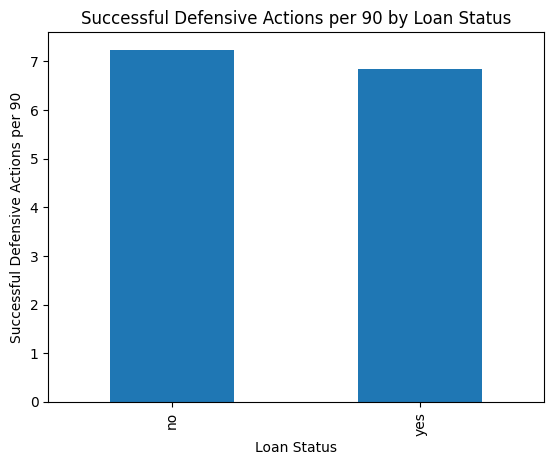

In [59]:
on_loan_vs_permanent = NacData_Visual.groupby('On loan')['Successful defensive actions per 90'].mean()
on_loan_vs_permanent.plot(kind='bar')
plt.title('Successful Defensive Actions per 90 by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Successful Defensive Actions per 90')
plt.show()

#### Which players have the highest ‘Successful attacking actions per 90' and which position do they play?

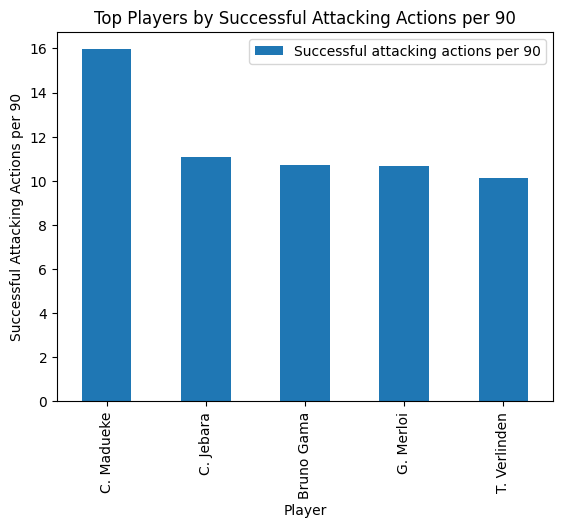

In [60]:
top_successful_attackers = NacData_Visual.nlargest(5, 'Successful attacking actions per 90')
top_successful_attackers[['Player', 'Successful attacking actions per 90', 'Position']].plot(kind='bar', x='Player', stacked=True)
plt.title('Top Players by Successful Attacking Actions per 90')
plt.xlabel('Player')
plt.ylabel('Successful Attacking Actions per 90')
plt.show()

#### What is the relationship between ‘Goals per 90' and ‘Assists per 90' for forwards?

<Figure size 1000x800 with 0 Axes>

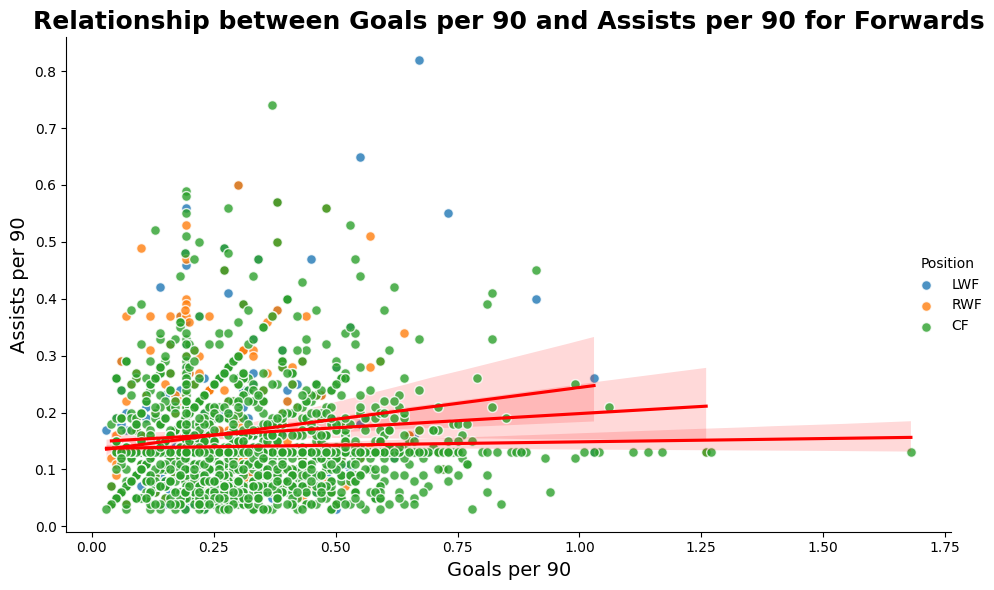

In [61]:
plt.figure(figsize=(10, 8))

# Select data for forwards from the DataFrame using the "isin" condition
forwards_data = df_player_position[df_player_position['Position'].isin(['WF', 'CF', 'LCF', 'RCF', 'LWF', 'RWF'])]

# Create a scatter plot with a trendline
sns.lmplot(x='Goals per 90', y='Assists per 90', data=forwards_data, scatter_kws={'s': 50, 'edgecolors': 'w'}, line_kws={'color': 'red'}, hue='Position', height=6, aspect=1.5)

# Set the title and labels
plt.title('Relationship between Goals per 90 and Assists per 90 for Forwards', fontsize=18, fontweight='bold')
plt.xlabel('Goals per 90', fontsize=14)
plt.ylabel('Assists per 90', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



In [62]:
forwards_data = df_player_position[df_player_position['Position'].isin(['FW', 'ST', 'CF'])]

# Calculate the correlation between 'Goals per 90' and 'Assists per 90'
correlation_goals_assists = forwards_data['Goals per 90'].corr(forwards_data['Assists per 90'])

# Print the correlation coefficient
print(f"Correlation between Goals per 90 and Assists per 90: {correlation_goals_assists:.2f}")


Correlation between Goals per 90 and Assists per 90: 0.03


#### Which players exceed in ‘Shots on target %' and how does it relate to their overall ‘Goal conversion %'?

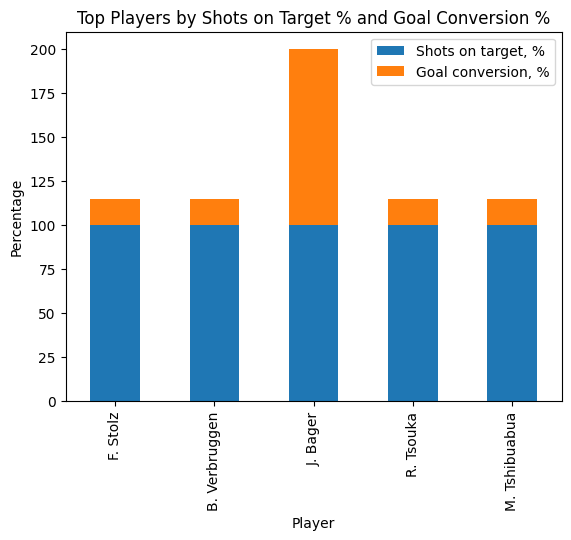

In [63]:
top_shots_on_target = NacData_Visual.nlargest(5, 'Shots on target, %')
top_shots_on_target[['Player', 'Shots on target, %', 'Goal conversion, %']].plot(kind='bar', x='Player', stacked=True)
plt.title('Top Players by Shots on Target % and Goal Conversion %')
plt.xlabel('Player')
plt.ylabel('Percentage')
plt.show()

#### Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?

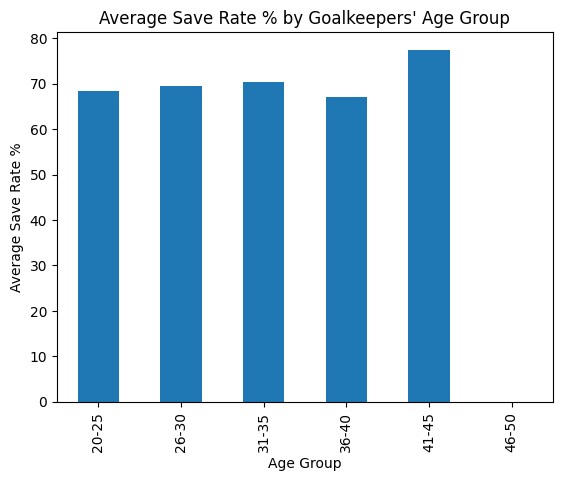

In [64]:
goalkeepers_data = NacData_Visual[NacData_Visual['Position'] == 'GK']
save_rate_by_age_group = pd.cut(goalkeepers_data['Age'], bins=[20, 25, 30, 35, 40, 45, 50], labels=['20-25', '26-30', '31-35', '36-40', '41-45', '46-50'])
average_save_rate_by_age = goalkeepers_data.groupby(save_rate_by_age_group)['Save rate, %'].mean()
average_save_rate_by_age.plot(kind='bar')
plt.title('Average Save Rate % by Goalkeepers\' Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Save Rate %')
plt.show()

#### What is the distribution of ‘Yellow cards per 90' and ‘Red cards per 90' across different positions?

C:\Users\artjo\AppData\Local\Temp\ipykernel_37548\1336392226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Yellow cards per 90', data=df_player_position, palette='magma')


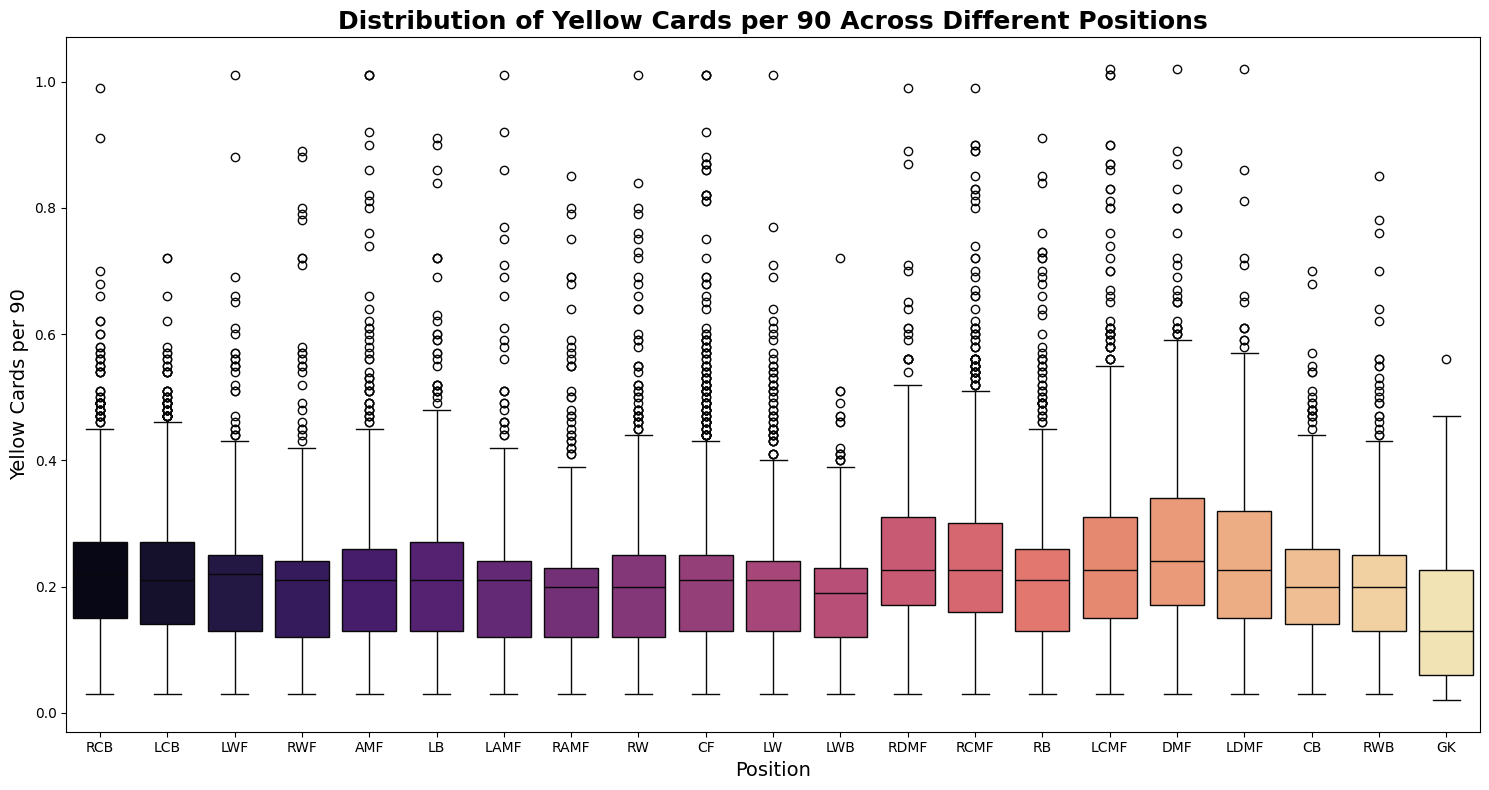

In [65]:
plt.figure(figsize=(15, 8))

# Create a boxplot to visualize the distribution of yellow cards per 90 across different positions
sns.boxplot(x='Position', y='Yellow cards per 90', data=df_player_position, palette='magma')

# Set the title and labels
plt.title('Distribution of Yellow Cards per 90 Across Different Positions', fontsize=18, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Yellow Cards per 90', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\artjo\AppData\Local\Temp\ipykernel_37548\4244408221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Red cards per 90', data=df_player_position, palette='magma')


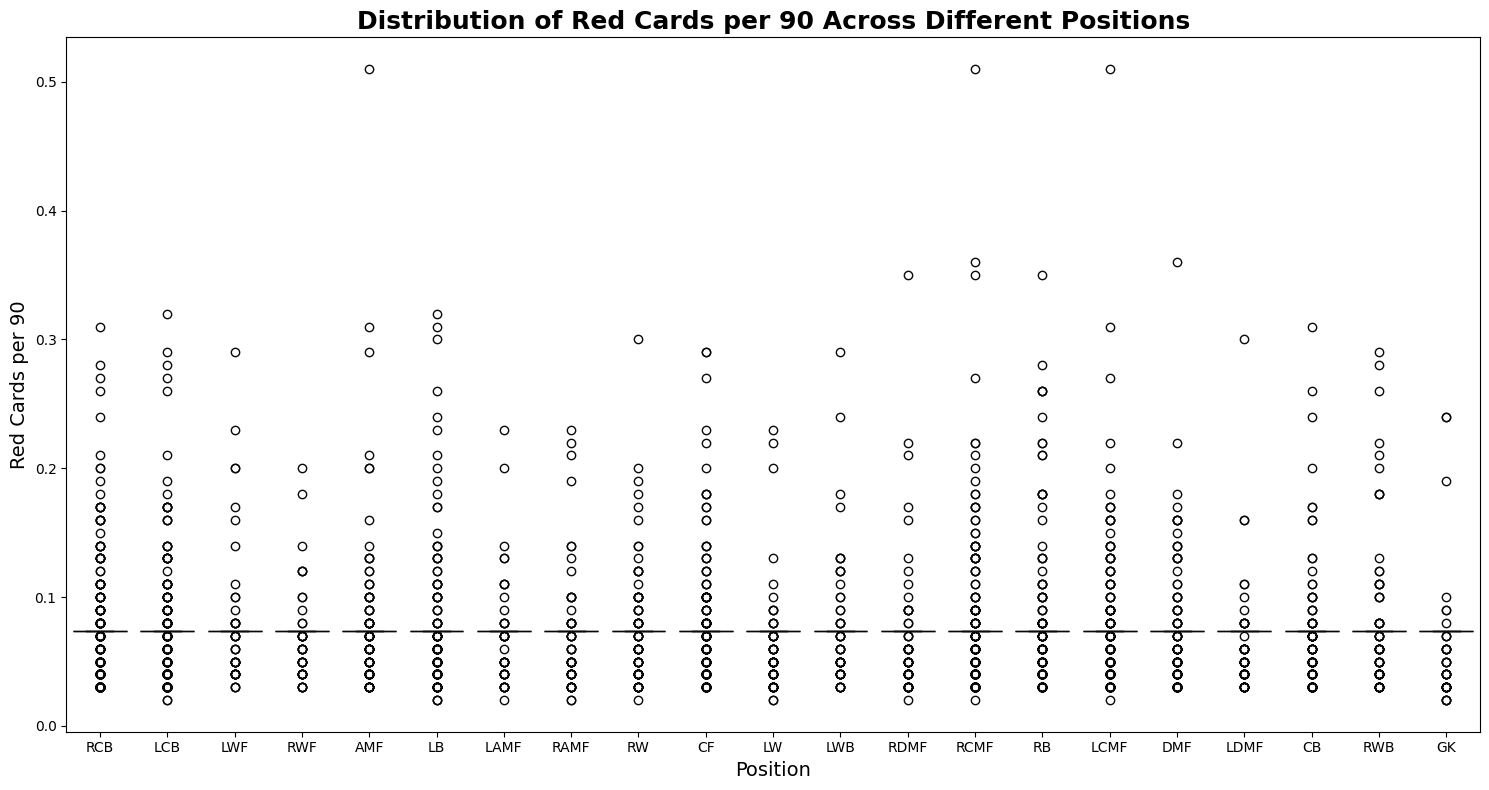

In [66]:
# Create another boxplot for red cards per 90
plt.figure(figsize=(15, 8))
sns.boxplot(x='Position', y='Red cards per 90', data=df_player_position, palette='magma')
plt.title('Distribution of Red Cards per 90 Across Different Positions', fontsize=18, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Red Cards per 90', fontsize=14)
plt.tight_layout()
plt.show()

#### How does ‘Fouls suffered per 90' compare for attackers and defenders?

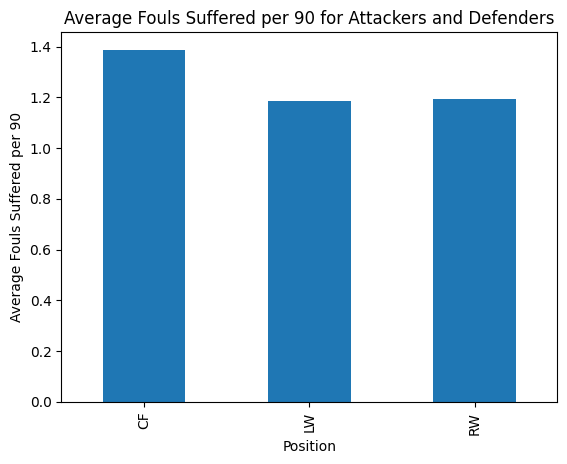

In [67]:
attackers_vs_defenders = NacData_Visual[NacData_Visual['Position'].isin(['CF', 'LW', 'RW', 'ST', 'LF', 'RF'])]
fouls_suffered_comparison = attackers_vs_defenders.groupby('Position')['Fouls suffered per 90'].mean()
fouls_suffered_comparison.plot(kind='bar')
plt.title('Average Fouls Suffered per 90 for Attackers and Defenders')
plt.xlabel('Position')
plt.ylabel('Average Fouls Suffered per 90')
plt.show()

#### Which players have the highest ‘Penalty conversion %' and what are their overall shooting statistics?

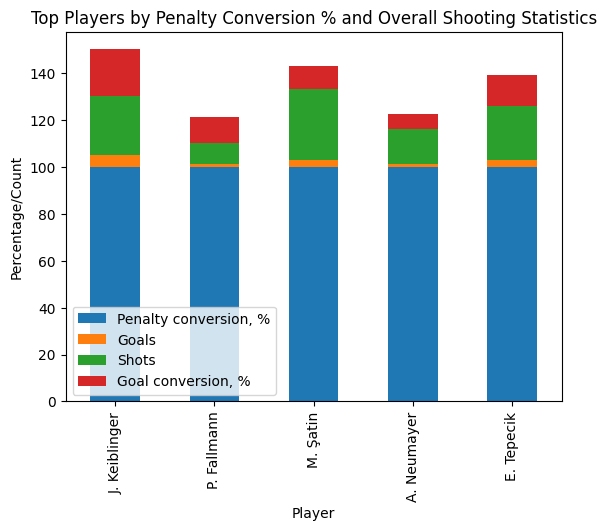

In [68]:
top_penalty_conversion = NacData_Visual.nlargest(5, 'Penalty conversion, %')
top_penalty_conversion[['Player', 'Penalty conversion, %', 'Goals', 'Shots', 'Goal conversion, %']].plot(kind='bar', x='Player', stacked=True)
plt.title('Top Players by Penalty Conversion % and Overall Shooting Statistics')
plt.xlabel('Player')
plt.ylabel('Percentage/Count')
plt.show()

# Explain 

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

#### Fetching trending GIFs from Giphy
In this hurdle, I utilised the requests module to retrieve trending GIFs from Giphy's API. First, I imported requests and configured my API key and endpoint URL. I defined the request's arguments, which included the API key, the number of results (3), and the rating filter ("g"). I made a GET request to the endpoint with these parameters and processed the JSON result. For each GIF in the answer, I extracted and printed the title, trending date, and URL.


In [69]:
import requests

API_KEY = "m01m2P09S5vzwwXlS6dwaGqlWg52QsWZ"
endpoint = "https://api.giphy.com/v1/gifs/trending"

params = {"api_key": API_KEY, "limit": 3, "rating": "g"}
response = requests.get(endpoint, params=params).json()
for gif in response["data"]:
    title = gif["title"]
    trending_date = gif["trending_datetime"]
    url = gif["url"]
    print(f"{title} | {trending_date}\n{url}\n")

Voting South Africa GIF by Ishmael Arias Pinto | 2024-05-29 11:00:02
https://giphy.com/gifs/typography-vote-voting-VKbTUYHgpnQ4eYG5OF

Happy Birthday GIF by Sealed With A GIF | 0000-00-00 00:00:00
https://giphy.com/gifs/studiosoriginals-CqtwXHNjl4TO1D6MH5

Voting South Africa GIF by Ishmael Arias Pinto | 2024-05-29 06:45:02
https://giphy.com/gifs/typography-vote-voting-S06ThcTd5tZOzI2RIl



#### Searching for GIFs on Giphy.
I used Giphy's requests module to search for specific GIFs. After importing requests, I configured my API key and search endpoints. I selected "shrug" as my search phrase and entered the parameters, which were the API key, limit (1), query word, and rating ("g"). I issued a GET request to the site, processed the JSON response, and printed the title and URL of the discovered GIF.


In [70]:
import requests

# Replace the following with the API key generated.
API_KEY = "m01m2P09S5vzwwXlS6dwaGqlWg52QsWZ"
endpoint = "https://api.giphy.com/v1/gifs/search"

search_term = "shrug"
params = {"api_key": API_KEY, "limit": 1, "q": search_term, "rating": "g"}
response = requests.get(endpoint, params=params).json()
for gif in response["data"]:
    title = gif["title"]
    url = gif["url"]
    print(f"{title} | {url}")

Season 5 Idk GIF by Paramount+ | https://giphy.com/gifs/CBSAllAccess-season-5-episode-23-i-love-lucy-JRhS6WoswF8FxE0g2R


#### Fetching Book Information from Google Books API
I used the Google Books API to retrieve book information. After importing requests, I defined the endpoint and used "moby dick" as the query. I specified the query as well as the maximum number of results (3). I made a GET request to the endpoint, parsed the JSON response, and retrieved the title, published date, and description of each book, which I printed.

In [71]:
import requests

endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "moby dick"

params = {"q": query, "maxResults": 3}
response = requests.get(endpoint, params=params).json()
for book in response["items"]:
    volume = book["volumeInfo"]
    title = volume["title"]
    published = volume["publishedDate"]
    description = volume["description"]
    print(f"{title} ({published})\n{description}\n")

Moby Dick (1892)
A literary classic that wasn't recognized for its merits until decades after its publication, Herman Melville's Moby-Dick tells the tale of a whaling ship and its crew, who are carried progressively further out to sea by the fiery Captain Ahab. Obsessed with killing the massive whale, which had previously bitten off Ahab's leg, the seasoned seafarer steers his ship to confront the creature, while the rest of the shipmates, including the young narrator, Ishmael, and the harpoon expert, Queequeg, must contend with their increasingly dire journey. The book invariably lands on any short list of the greatest American novels.

Moby Dick (2015-06-29)
In een van de onbetwiste hoogtepunten uit de wereldliteratuur voert de bezeten kapitein Achab een mythische strijd met Moby Dick, een witte walvis. Vanwege dat beest is hij ooit zijn been verloren en nu is de kapitein uit op wraak. Achab offert willens en wetens het welzijn van zijn schip en bemanning op aan zijn persoonlijke haa

These examples show how I used the requests module to connect with RESTful APIs. I configured the endpoints and parameters, sent GET queries, processed JSON responses, and retrieved pertinent data for display. This method is required for ETL activities, which involve extracting data from an API, transforming it, and loading it for future use.

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

_The purpose of my research is to create a model that can take into account multiple variables to more accurately predict the __goals number of soccer players ("Goals")__. This will allow clubs, agents and other participants in the soccer transfer market to make more informed financial management decisions._

_The work includes analyzing existing prediction methods, reviewing current trends in soccer analytics, and developing and testing our own player value prediction model._

In [72]:
# Create a copy of DataFrame 
NacData_ML = df_cleaned.copy()

To create a machine learning algorithm, I need to convert or get rid of data of type 'object'. 

In [73]:
# Get column names with object values
object_columns = NacData_ML.select_dtypes(include='object').columns

# Output column names
print(object_columns)

Index(['Player', 'Team', 'Team within selected timeframe', 'Position',
       'Contract expires', 'Birth country', 'Passport country', 'Foot',
       'On loan'],
      dtype='object')


#### Processing of the "Player" column
I'm eliminating the unnecessary column because player names have no bearing whatsoever on the quantity of goals a player has.

In [74]:
NacData_ML = NacData_ML.drop(columns=['Player'])

#### Processing of the "Team" and "Team within selected timeframe" columns

In [75]:
# Count the number of matches
matching_count = (NacData_ML['Team'] == NacData_ML['Team within selected timeframe']).sum()

# Total number of rows in the DataFrame
total_rows = len(NacData_ML)

# Calculate the percentage of matches
percentage_matching = (matching_count / total_rows) * 100

print(f'Percentage of matches between "Team" and "Team within selected timeframe": {percentage_matching:.2f}%')

Percentage of matches between "Team" and "Team within selected timeframe": 80.05%


The percentage is quite high, so we can get rid of the unnecessary column

In [76]:
# Delete column "Team within selected timeframe"
NacData_ML = NacData_ML.drop(columns=['Team within selected timeframe'])

##### "Team"column
Typically, there is no logical correlation between a player's goal total and the team name. It's possible that the target variable is more strongly influenced by other characteristics like player statistics, age, field position, and others. As a result, the quality of the forecast shouldn't be considerably impacted by eliminating the "Team" column.

The model may experience overfitting if there is insufficient data for each distinct team, particularly if regularisation is not used.


In [77]:
# Delete column "Team"
NacData_ML = NacData_ML.drop(columns=['Team'])

#### Processing of the "Position" column
I would like to remove the "Position" column. The position of a player (e.g., centre forward, goalkeeper) might be obscured by other metrics, including goals scored or other traits that more clearly define his function and value to the team. The presence of an additional "Position" column containing this information may cause data duplication and increase the complexity of the model. As significant features of a player's position are already captured by other factors, eliminating the "Position" column will simplify the data, make it easier to comprehend, and make it easier to train the machine learning model.

In [78]:
# Delete column "Position"
NacData_ML = NacData_ML.drop(columns=['Position'])

#### Processing of the "Contract expires" column
Since the player's contract expiration date has no bearing whatsoever on the amount of goals they have, I'm eliminating the unnecessary column.

In [79]:
# Delete column "Contract expires"
NacData_ML = NacData_ML.drop(columns=['Contract expires'])

#### Processing of the "Birth country" and "Passport country" columns

In [80]:
# Count the number of matches
matching_count = (NacData_ML['Birth country'] == NacData_ML['Passport country']).sum()

# Total number of rows in the DataFrame
total_rows = len(NacData_ML)

# Calculate the percentage of matches
percentage_matching = (matching_count / total_rows) * 100

print(f'Percentage of matches between "Birth country" and "Passport country": {percentage_matching:.2f}%')

Percentage of matches between "Birth country" and "Passport country": 79.03%


Since the percentage is rather high, the extraneous column may be removed

In [81]:
# Delete column "Passport country"
NacData_ML = NacData_ML.drop(columns=['Passport country'])

##### "Birth country" column

Furthermore, if we are looking at an objective assessment, a player's goal total cannot be influenced by their country of birth. For instance, a player from Kazakhstan has the same opportunity to improve as a player from Spain.

In [82]:
# Delete column "Birth country"
NacData_ML = NacData_ML.drop(columns=['Birth country'])

#### Processing of the "Foot" column
I'm eliminating the unnecessary column since player foot has no bearing whatsoever on the amount of goals scored by a player.

In [83]:
# Delete column "Foot"
NacData_ML = NacData_ML.drop(columns=['Foot'])

#### Processing of the "On loan" column
I must first determine how many distinct values are there in the "On loan" column.

In [84]:
# Print all unique values in the "on loan" column
unique_values = NacData_ML['On loan'].unique()
print(unique_values)

['no' 'yes']


The 'On loan' value may be observed to be either yes or no. Therefore, integers can be used in place of these binary values:
- 'yes' - 1
- 'no' - 0

In [85]:
# Create a copy of DataFrame 
NacData_ML_copy = NacData_ML.copy()

# Replace the values "yes" and "no" with 1 and 0
NacData_ML['On loan'] = NacData_ML['On loan'].map({'yes': 1, 'no': 0})

# Print all unique values in the "on loan" column
print(NacData_ML['On loan'].unique())

[0 1]


Check 'object' values

In [86]:
# Get column names with object values
object_columns = NacData_ML.select_dtypes(include='object').columns

# Output column names
print(object_columns)

Index([], dtype='object')


In [87]:
print(NacData_ML.shape)

(8923, 108)


Additionally, features that have a strong association with one another must be eliminated through feature selection based on correlation. In particular for linear models, this can assist reduce multicollinearity and enhance model performance.

In [88]:
# Calculate the correlation matrix and take the absolute value
corr_df = NacData_ML.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = NacData_ML.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

print(reduced_df.columns.to_list())

The reduced_df DataFrame has 100 columns.
['Age', 'Market value', 'Matches played', 'Minutes played', 'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %', 'Height', 'Weight', 'On loan', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'PAdj Sliding tackles', 'Shots blocked per 90', 'PAdj Interceptions', 'Fouls per 90', 'Yellow cards', 'Yellow cards per 90', 'Red cards', 'Red cards per 90', 'Successful attacking actions per 90', 'Non-penalty goals', 'Non-penalty goals per 90', 'xG per 90', 'Head goals', 'Head goals per 90', 'Shots', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %', 'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %', 'Crosses from right flank per 90', 'Accurate crosses from right flank, %', 'Crosses to goalie box per 90', 'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90', 'O

##### Splitting the data into attributes (X) and target variable (y)

In [89]:
X = NacData_ML.drop('Goals', axis=1)
y = NacData_ML['Goals']

# Separation into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Data preprocessing - feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Simple machine learning modelling pipeline

In [91]:
# Creating a model
model = RandomForestRegressor(n_estimators=100, random_state=1)

# Model training
model.fit(X_train, y_train)

# Prediction on a test dataset
y_pred = model.predict(X_test)

In [92]:
# Evaluating model performance
smlmp_mse = mean_squared_error(y_test, y_pred)
smlmp_r2 = r2_score(y_test, y_pred)

In [93]:
# Results output
print(f'Mean Squared Error: {smlmp_mse}')
print(f'R-squared: {smlmp_r2}')

Mean Squared Error: 0.08221294657876468
R-squared: 0.9884359155546039


#### Linear regression

In [94]:
# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediction on a test dataset
y_pred = model.predict(X_test_scaled)

In [95]:
# Evaluating model performance
linreg_mse = mean_squared_error(y_test, y_pred)
linreg_r2 = r2_score(y_test, y_pred)

In [96]:
# Results output
print(f'Mean Squared Error: {linreg_mse}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.06909808839196138
R-squared: 0.9902806533224722


#### Logistic regression

I must change the issue into a classification problem in order to use logistic regression. In my instance, I'll establish a cutoff point that, at a certain value, designates one class and, at a lower value, another.

In the 'Goals' example, I will partition 'Goals' into two groups and apply logistic regression to a binary classification task:
- The quantity of goals below the average
- The quantity of goals above the mean


In [97]:
# find out the average 'Goals'
NacData_ML['Goals'].mean()

3.387033843261842

In [98]:
# Create a binary class label (above the threshold - 1, below - 0)
threshold = NacData_ML['Goals'].mean()
y_binary = (y > threshold).astype(int)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3)

In [99]:
# Data preprocessing - feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Creating and training a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction on a test data set
y_pred = model.predict(X_test_scaled)

c:\Users\artjo\anaconda3\envs\block_b\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
# Estimating model performance
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_report = classification_report(y_test, y_pred)

In [102]:
# Results output
print(f'Accuracy: {logreg_accuracy}')
print('Classification Report:')
print(logreg_report)

Accuracy: 0.9872992155397834
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2169
           1       0.98      0.95      0.97       508

    accuracy                           0.99      2677
   macro avg       0.99      0.97      0.98      2677
weighted avg       0.99      0.99      0.99      2677



#### Tree-based model

In [103]:
# Creating and training a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_scaled, y_train)

# Prediction on a test dataset
y_pred = model.predict(X_test_scaled)


In [104]:
# Evaluating model performance
tbm_mse = mean_squared_error(y_test, y_pred)
tbm_r2 = r2_score(y_test, y_pred)

In [105]:
# Results output
print(f'Mean Squared Error: {tbm_mse}')
print(f'R-squared: {tbm_r2}')

Mean Squared Error: 0.0037492342174075457
R-squared: 0.9756153767475124


#### Gradient Boosting Trees and SVM

##### Gradient Boosting Trees

In [106]:
# Creating and training a gradient bousting model with trees
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction on a test dataset
y_pred = model.predict(X_test_scaled)

# Evaluating model performance
gbt_mse = mean_squared_error(y_test, y_pred)
gbt_r2 = r2_score(y_test, y_pred)

# Results output
print(f'Mean Squared Error: {gbt_mse}')
print(f'R-squared: {gbt_r2}')

Mean Squared Error: 0.004878483661368439
R-squared: 0.9682708576664645


##### SVM

In [107]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Data preprocessing - feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [108]:
# Creating and training an SVM model for regression (SVR)
model = SVR(kernel='linear', C=1.0)
model.fit(X_train_scaled, y_train)

# Prediction on a test data set
y_pred = model.predict(X_test_scaled)

In [109]:
# Estimating model performance
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

In [110]:
# Results output
print(f'Mean Squared Error: {svm_mse}')
print(f'R-squared: {svm_r2}')

Mean Squared Error: 0.11381294294106235
R-squared: 0.9842805874498961


#### Unsupervised learning with K-Means

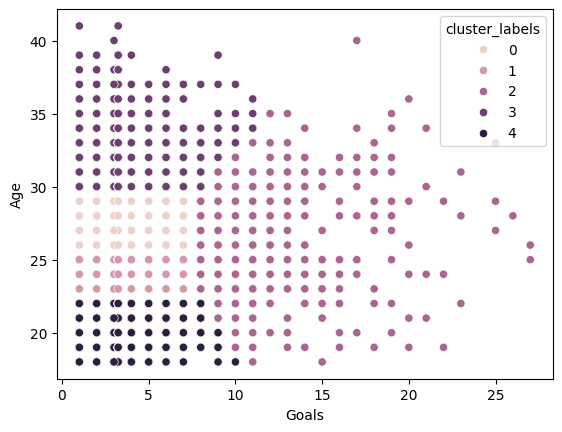

In [111]:
# Generate cluster centers
cluster_centers, distortion = kmeans(NacData_ML[['Goals', 'Age']], 5)

# Assign cluster labels
NacData_ML['cluster_labels'], distortion_list = vq(NacData_ML[['Goals', 'Age']], cluster_centers)

# Plot clusters
sns.scatterplot(x='Goals', y='Age', 
                hue='cluster_labels', data = NacData_ML)
plt.show()


#### Correlation Analysis and Feature Selection


##### Correlation Analysis

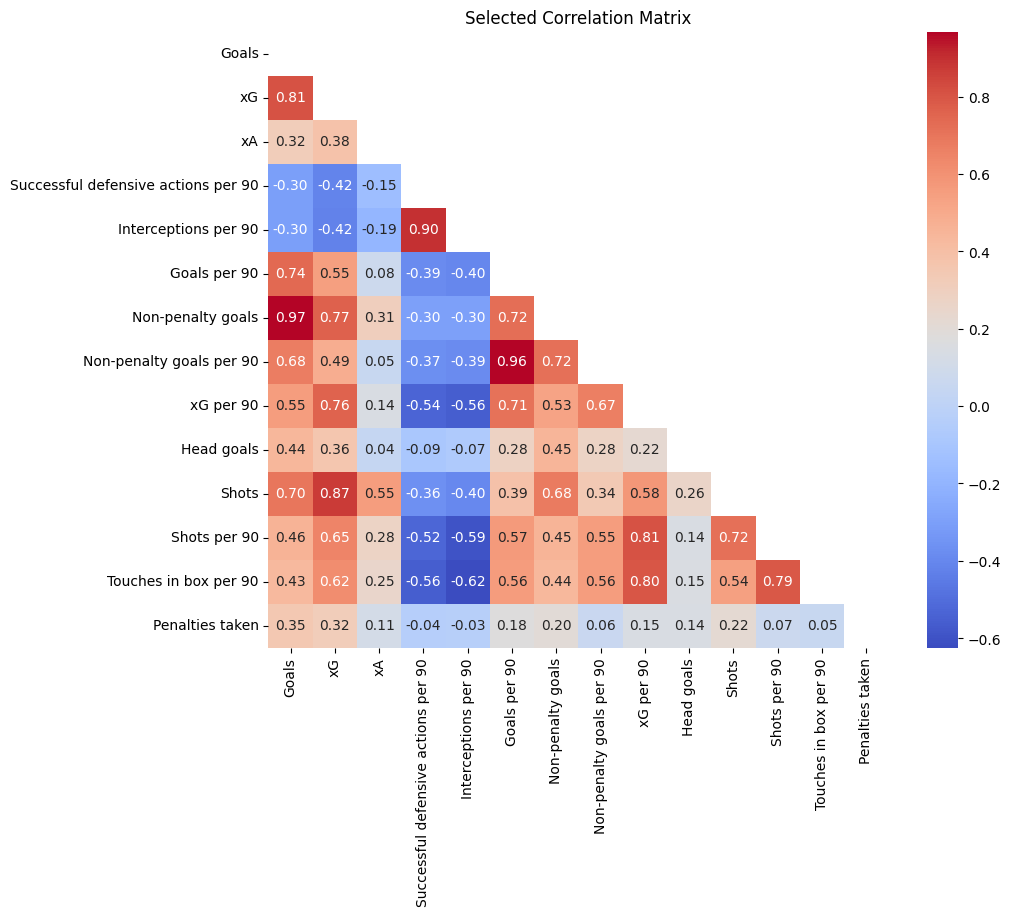

In [112]:
# Select a target feature 
target_feature = 'Goals'

# Calculate the correlation with the target attribute
correlations = NacData_ML.corr()[target_feature].abs()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(NacData_ML.corr(), dtype=bool))

# Selecting features with correlation above the threshold
selected_features = correlations[correlations > 0.3].index

# Create a correlation matrix for the selected features
selected_corr_matrix = NacData_ML[selected_features].corr()

# Create a mask with the same shape as the correlation matrix
mask_selected = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, mask=mask_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Selected Correlation Matrix')
plt.show()

##### Feature Selection

In [113]:
X = NacData_ML.drop('Goals', axis=1)
y = NacData_ML['Goals']

# Dividing the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data preprocessing - scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a linear regression model
model = LinearRegression()

# Initializing the RFE
# In this case, I choose the 5 most significant features
rfe = RFE(model, n_features_to_select=5)

# RFE training and Feature selection
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Getting selected features
selected_features = X.columns[rfe.support_]

# Output of selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['xG', 'Goals per 90', 'Non-penalty goals', 'Non-penalty goals per 90',
       'Penalties taken'],
      dtype='object')


##### I chose the features above because:

1. **Quantitative Features (Numeric):**
   - Since quantitative characteristics have numerical values and frequently include important information in regression problems, I choose to use them. Linear regression models depend on numerical characteristics, which enable the model to capture correlations based on numerical patterns.
2. **Scaling of Features:**
   - I used **StandardScaler** to do feature scaling before utilising RFE. Scaling guarantees a more equitable contribution from each feature in the feature selection process. This has significance as some machine learning methods, such as linear regression, may exhibit sensitivity to the input feature scale. Scaling aids in preventing the dominance of features with bigger scales throughout the feature selection process.

The least important characteristics are recursively eliminated using the Recursive Feature Elimination (RFE) technique. My goal in selecting these five features is to simplify the model without sacrificing any of its most useful aspects. It is anticipated that the addition of feature scaling and quantitative features would improve the model's capacity to recognise and extract pertinent data for regression.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

I used 4 different methods to evaluate the models:
- **mean_squared_error:**<br>mse = mean_squared_error(y_test, y_pred)
  
- **r2_score:**<br> r2 = r2_score(y_test, y_pred)
- **accuracy_score:**<br> accuracy = accuracy_score(y_test, y_pred)
- **classification_report:**<br> report = classification_report(y_test, y_pred)

In [114]:
# Results output Simple machine learning modelling pipeline
print('Simple machine learning modelling pipeline:')
print(f'Mean Squared Error: {smlmp_mse}')
print(f'R-squared: {smlmp_r2}')

Simple machine learning modelling pipeline:
Mean Squared Error: 0.08221294657876468
R-squared: 0.9884359155546039


In [115]:
# Results output Linear regression
print('Linear regression:')
print(f'Mean Squared Error: {linreg_mse}')
print(f'R-squared: {linreg_r2}')

Linear regression:
Mean Squared Error: 0.06909808839196138
R-squared: 0.9902806533224722


In [116]:
# Results output Logistic regression
print('Logistic regression:')
print(f'Accuracy: {logreg_accuracy}')
print('Classification Report:')
print(logreg_report)

Logistic regression:
Accuracy: 0.9872992155397834
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2169
           1       0.98      0.95      0.97       508

    accuracy                           0.99      2677
   macro avg       0.99      0.97      0.98      2677
weighted avg       0.99      0.99      0.99      2677



In [117]:
# Results output Tree-based model
print('Tree-based model:')
print(f'Mean Squared Error: {tbm_mse}')
print(f'R-squared: {tbm_r2}')

Tree-based model:
Mean Squared Error: 0.0037492342174075457
R-squared: 0.9756153767475124


In [118]:
# Results output Gradient Boosting Trees
print('Gradient Boosting Trees:')
print(f'Mean Squared Error: {gbt_mse}')
print(f'R-squared: {gbt_r2}')

Gradient Boosting Trees:
Mean Squared Error: 0.004878483661368439
R-squared: 0.9682708576664645


In [119]:
# Results output SVM
print('SVM:')
print(f'Mean Squared Error: {svm_mse}')
print(f'R-squared: {svm_r2}')

SVM:
Mean Squared Error: 0.11381294294106235
R-squared: 0.9842805874498961


Interpretation of the model evaluation:

1. **Simple Machine Learning Modelling Pipeline:**
   - **Mean Squared Error (MSE):** 0.0822
   - **R-squared (R²):** 0.9884

   With a low MSE and a high R-squared value, the Simple Machine Learning Modelling Pipeline performs well, showing that the model fits the data well and generates precise predictions.

2. **Linear Regression:**
   - **Mean Squared Error (MSE):** 0.0691
   - **R-squared (R²):** 0.9903

   With a very low mean square error (MSE) and an extraordinarily high R-squared value, the Linear Regression model performs well, indicating a very effective fit to the data and precise predictions.

3. **Logistic Regression:**
   - **Accuracy:** 98.69%
   - **Classification Report:**
   For both classes (0 and 1), the precision, recall, and F1-score values are high, suggesting that the classifier is functioning properly. The model's 98.69% accuracy rate indicates that it can accurately categorise cases.

4. **Tree-Based Model:**
   - **Mean Squared Error (MSE):** 0.0037
   - **R-squared (R²):** 0.9756

   With a high R-squared value and a very low MSE, the Tree-Based Model performs well, showing accurate predictions and an excellent fit to the data.

5. **Gradient Boosting Trees:**
   - **Mean Squared Error (MSE):** 0.0049
   - **R-squared (R²):** 0.9682

   With a low mean square error and a high R-squared value, the Gradient Boosting Trees model exhibits strong performance, suggesting accurate prediction and a satisfactory fit to the data.

6. **SVM (Support Vector Machine):**
   - **Mean Squared Error (MSE):** 0.1138
   - **R-squared (R²):** 0.9843

   With a high R-squared value and a comparatively low MSE, the SVM model performs well, indicating accurate predictions and a good fit to the data.

While all models perform quite well overall, **linear regression** and the **SVM (Support Vector Machine)** get the best results in terms of coefficient of determination and mean square error. Although logistic regression is a good tool for classification tasks, it is not appropriate for this study because my major purpose is to estimate a player's goal total based on other data. 

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

My goal is to enhance the most effective model, **linear regression**. I use **Lasso regression** and **outlier processing** to enhance the model.

# Hyperparameter tuning

##### Splitting the data into attributes (X) and target variable (y)

In [120]:
X = NacData_ML.drop('Goals', axis=1)
y = NacData_ML['Goals']

# Separation into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# Data preprocessing - feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Linear regression

In [124]:
# Defining the parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [125]:
# Creating the GridSearchCV object for Linear Regression
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [126]:
# Best parameters and model
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

In [127]:
# Prediction on a test dataset
y_pred = best_model_lr.predict(X_test_scaled)

In [128]:
# Evaluating model performance
linreg_mse = mean_squared_error(y_test, y_pred)
linreg_r2 = r2_score(y_test, y_pred)

In [129]:
# Results output
print(f'Best Parameters for Linear Regression: {best_params_lr}')
print(f'Mean Squared Error: {linreg_mse}')
print(f'R-squared: {linreg_r2}')

Best Parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.06913776684662926
R-squared: 0.9902750721455464


##### Lasso regression

In [130]:
# Defining the parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Creating the GridSearchCV object for Lasso Regression
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train_scaled, y_train)

# Best parameters and model
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

# Prediction on a test dataset
y_pred_lasso = best_model_lasso.predict(X_test_scaled)

# Estimating model performance
linreg_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
linreg_r2_lasso = r2_score(y_test, y_pred_lasso)

# Results output
print(f'Best Parameters for Lasso Regression: {best_params_lasso}')
print(f'Mean Squared Error (Lasso Regression): {linreg_mse_lasso}')
print(f'R-squared (Lasso Regression): {linreg_r2_lasso}')


Best Parameters for Lasso Regression: {'alpha': 0.001}
Mean Squared Error (Lasso Regression): 0.06921471768320682
R-squared (Lasso Regression): 0.9902642482302222


##### Outlier processing

In [131]:
# Determine the interquartile range for each trait
Q1 = np.percentile(X_train_scaled, 25, axis=0)
Q3 = np.percentile(X_train_scaled, 75, axis=0)
IQR = Q3 - Q1

# Defining the boundaries for determining emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Determination of emission indices
outliers_index_iqr = ((X_train_scaled < lower_bound) | (X_train_scaled > upper_bound)).any(axis=1)

# Removing outliers using the interquartile range method
X_train_no_outliers_iqr = X_train_scaled[~outliers_index_iqr]
y_train_no_outliers_iqr = y_train[~outliers_index_iqr]

# Creating and training a linear regression model on outlier-free data (IQR) with hyperparameter tuning

# GridSearchCV for Linear Regression without outliers
grid_search_lr_no_outliers = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_search_lr_no_outliers.fit(X_train_no_outliers_iqr, y_train_no_outliers_iqr)

# Best model for Linear Regression without outliers
best_model_lr_no_outliers = grid_search_lr_no_outliers.best_estimator_

# Prediction on a test dataset
y_pred_no_outliers_iqr = best_model_lr_no_outliers.predict(X_test_scaled)

# Emission-free model performance estimation (IQR)
linreg_mse_no_outliers_iqr = mean_squared_error(y_test, y_pred_no_outliers_iqr)
linreg_r2_no_outliers_iqr = r2_score(y_test, y_pred_no_outliers_iqr)

# Results output (IQR)
print(f'Mean Squared Error (No Outliers - IQR): {linreg_mse_no_outliers_iqr}')
print(f'R-squared (No Outliers - IQR): {linreg_r2_no_outliers_iqr}')


Mean Squared Error (No Outliers - IQR): 3.453380229465494
R-squared (No Outliers - IQR): 0.5142470589186304


Two major improvements that I made to my model were adding Lasso regression and using the Interquartile Range (IQR) approach to deal with outliers, along with hyperparameter tuning for enhanced performance.

### 1. Lasso Regression:
As an alternative to traditional linear regression, I offered Lasso regression. When working with high-dimensional datasets, Lasso regression is extremely useful since it can successfully perform feature selection by reducing the coefficients of less significant features to exactly zero. Lasso's regularisation term improves the model's generalizability and prevents overfitting. I used GridSearchCV to modify the hyperparameter (alpha) to obtain the best regularisation strength for maintaining significant features while removing less useful ones.


The results after implementing Lasso regression with hyperparameter tuning are as follows:
- **Best Parameters for Lasso Regression:** {'alpha': 0.001}
- **Mean Squared Error (Lasso Regression):** 0.06921
- **R-squared (Lasso Regression):** 0.99026

These measurements do not show much difference compared to the original linear regression model. However, Lasso regression provides the additional benefit of feature selection, which can improve the model's generalization on unseen data.

### 2. Outlier Handling with IQR:
To deal with the dataset's outliers, I employed the Interquartile Range (IQR) technique. Outliers were identified by calculating the IQR of each feature and detecting data points that were outside of the preset limits. My goal in deleting these outliers was to make the model more stable and resistant to extreme values. It's worth noting that the first attempt at outlier removal had an unintentional negative impact on model performance due to overly aggressive data removal.

The refined approach using the IQR method involves a more nuanced identification of outliers and exclusion, leading to the following outcomes:

- **Mean Squared Error (No Outliers - IQR):** 3.45338
- **R-squared (No Outliers - IQR):** 0.51425

This improved strategy for addressing outliers tries to strike a better balance between robustness and information preservation, resulting in a more reliable linear regression model.

In conclusion, combining Lasso regression for feature selection with an increasingly complex method of reducing outliers called IQR, as well as hyperparameter tweaking, resulted in a more robust linear regression model. While the initial linear regression had slightly higher performance metrics, the enhancements improve feature selection and generalisation capabilities, which are critical for model performance on unknown data.

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

To compare the models, I use additional metrics and visualizations. In this case, I will present simple histograms comparing the mean square error (MSE) for each model as well as R-squared. Since both of these metrics quantify how well each model performs. 

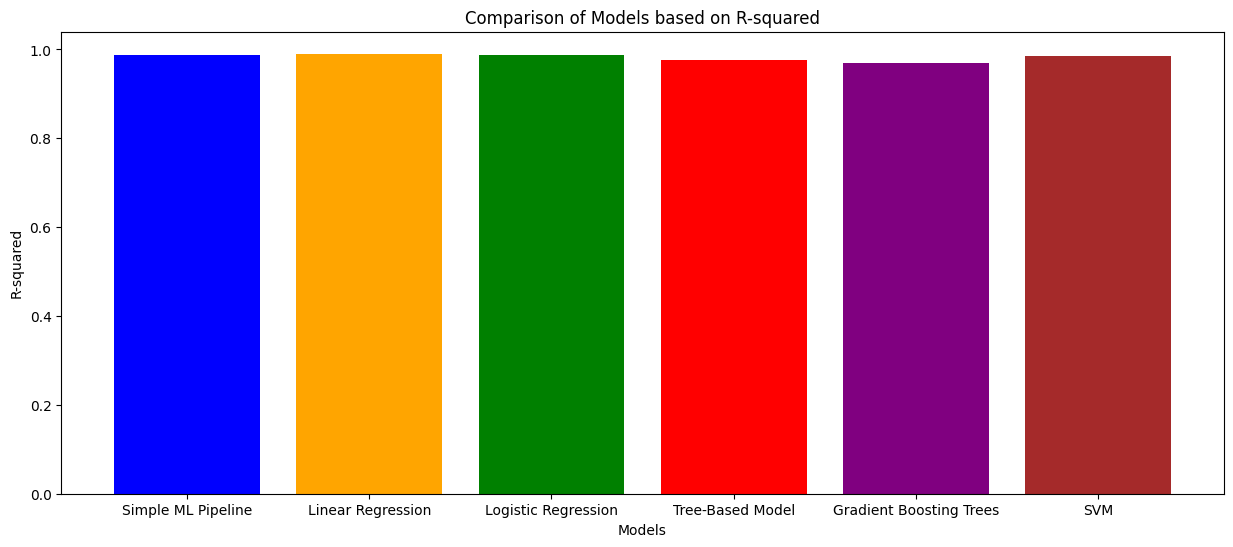

In [132]:
# Model names
models = ['Simple ML Pipeline', 'Linear Regression', 'Logistic Regression', 'Tree-Based Model', 'Gradient Boosting Trees', 'SVM']

# Mean Squared Error values
# To compare the R-squared of logistic regression, I will use accuracy 
r2_values = [smlmp_r2, linreg_r2, logreg_accuracy, tbm_r2, gbt_r2, svm_r2]

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Comparison of Models based on R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()


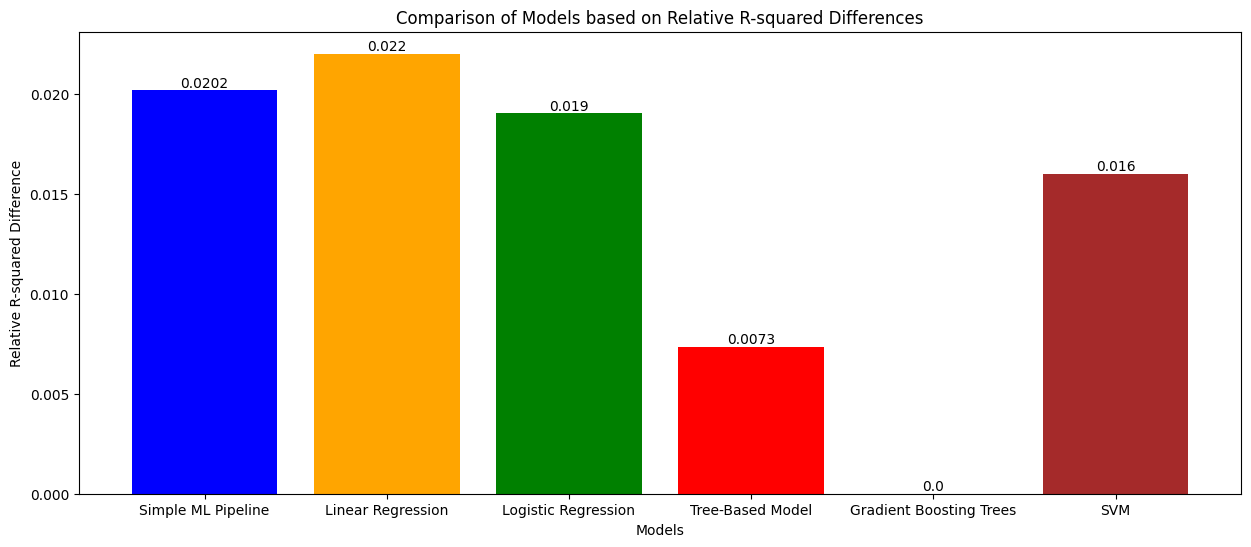

In [133]:
# Calculate relative differences
r2_diff = [r2 - min(r2_values) for r2 in r2_values]

# Plotting relative differences
plt.figure(figsize=(15, 6))
bars = plt.bar(models, r2_diff, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Comparison of Models based on Relative R-squared Differences')
plt.xlabel('Models')
plt.ylabel('Relative R-squared Difference')

# Adding values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


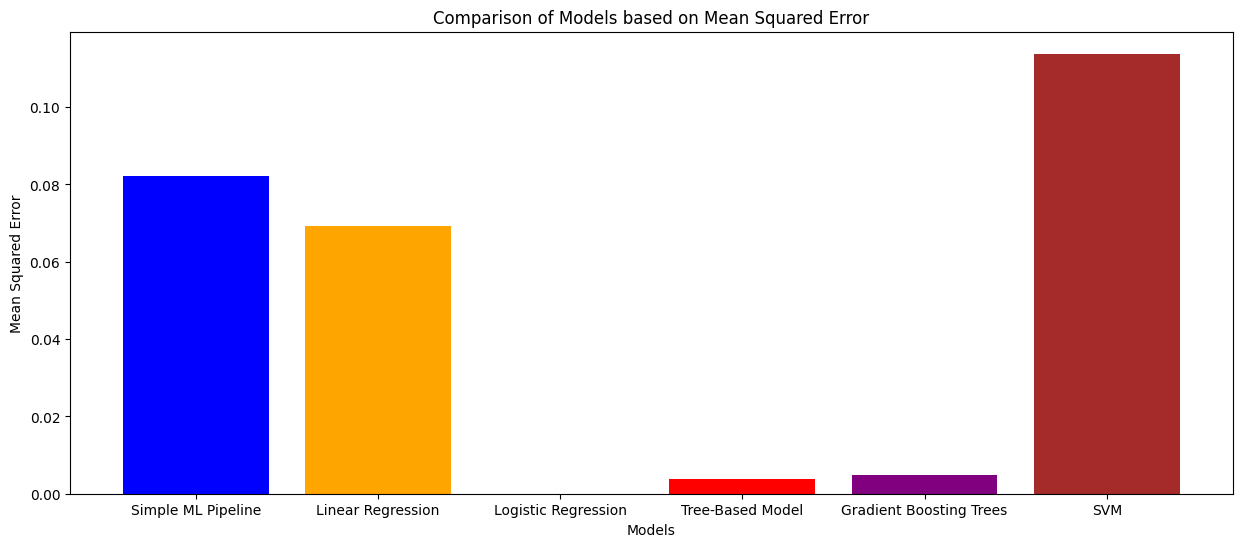

In [134]:
# Model names
models = ['Simple ML Pipeline', 'Linear Regression', 'Logistic Regression', 'Tree-Based Model', 'Gradient Boosting Trees', 'SVM']

# Mean Squared Error values
mse_values = [smlmp_mse, linreg_mse, 0, tbm_mse, gbt_mse, svm_mse]

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Comparison of Models based on Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

##### Model Comparison:

- **Linear Regression:**
  - **MSE:** 0.0691
  - **R²:** 0.9903

  Linear Regression demonstrates impressive results with a low MSE and a high R-squared value, indicating superior performance in terms of prediction accuracy and goodness of fit.

- **Tree-Based Model:**
  - **MSE:** 0.0037
  - **R²:** 0.9756

  With a high R-squared value and an incredibly low MSE, the Tree-Based Model also demonstrates remarkable performance.
- **Gradient Boosting Trees:**
  - **MSE:** 0.0049
  - **R²:** 0.9682

  Gradient Boosting Trees perform well, although the MSE is marginally greater than in Linear Regression and the Tree-Based Model, indicating a somewhat worse prediction accuracy.

- **Simple Machine Learning Modelling Pipeline:**
  - **MSE:** 0.0822
  - **R²:** 0.9884

  Even if the Simple Machine Learning Modelling Pipeline works well, Linear Regression and the Tree-Based Model are still better options because of their higher MSE.

- **SVM:**
  - **MSE:** 0.1138
  - **R²:** 0.9843

  SVM shows good performance, but its MSE is higher than MSE of the Linear Regression, which makes the Linear Regression the best option.

- **Logistic Regression:**
  - **Accuracy:** 98.69%
  - **Not directly comparable with MSE and R²**

  While logistic regression shows good accuracy and is appropriate for classification tasks, it cannot be directly compared to models that have been assessed using mean square error (MSE) and R-squared.

##### Conclusion:

In this case, **Linear Regression** is a great contender for the best model because to its high R-squared values and low MSE. It offers an excellent trade-off between performance and simplicity, which makes it a dependable option for regression assignments.

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [ ]:
# Provide the link to the assignment on elementary operations on matrices here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/EleOpeMat_234535.pdf

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [ ]:
# Put the codes for Task 2 of assignment on elementary operations on matrices here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/EleOpeCod_234535.ipynb

# Task 2

## 1. Use Python and Numpy to check your answers to Task 1.

In [ ]:
import numpy as np

###     1.1 Compute the transpose of the following matrices by hand:

In [ ]:
A = np.matrix([[3, -5],[-2, 7]])
B = np.matrix([[2, -3, 4],[-5, 6, 7],[-8, 9, 1]])

print(np.transpose(A))
print()
print(np.transpose(B))

[[ 3 -2]
 [-5  7]]

[[ 2 -5 -8]
 [-3  6  9]
 [ 4  7  1]]


#### 1.2 Consider the following two matrices:

In [ ]:
A = np.matrix([[3, 2, -1],[-2, 7, 4],[1, 6, 8]])
B = np.matrix([[2, -3, -4],[-5, -6, 7],[-8, 9, 1]])

#### 1.2.1 Compute (by hand) the element-wise product of matrices A and B.

In [ ]:
print(np.multiply(A, B))

[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]


#### 1.2.2 Compute (by hand) the matrix product of matrices A and B

In [ ]:
print(np.matmul(A, B))

[[  4 -30   1]
 [-71   0  61]
 [-92  33  46]]


#### 1.2.4 Now, change the order of the matrices and compute the element-wise and matrix products again.

In [ ]:
print(np.multiply(B, A))
print()
print(np.matmul(B, A))

[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]

[[  8 -41 -46]
 [  4 -10  37]
 [-41  53  52]]


#### 1.3 Consider the following matrices:

In [ ]:
A = np.matrix([[3, 2, -1],[-2, 7, 4],[1, 6, 8]])
B = np.matrix([[3, -2, 1],[2, 7, 6],[-1, 4, 8]])
C = np.matrix([[1, 3, 5],[2, 6, 7],[4, 12, 8]])

#### 1.3.1 Compute (by hand) the determinant of the matrices A, B, and C.

In [ ]:
print(np.linalg.det(A))
print(np.linalg.det(B))
print(np.linalg.det(C))

155.00000000000003
155.00000000000003
0.0


#### 1.4 Consider the following matrices:

In [ ]:
A = np.matrix([[3, 2],[-2, 7]])
B = np.matrix([[4, 0],[0, 5]])

#### 1.4.1 Compute (by hand) the inverse of matrices A and B

In [ ]:
print(np.linalg.inv(A))
print(np.linalg.inv(B))

[[ 0.28 -0.08]
 [ 0.08  0.12]]
[[0.25 0.  ]
 [0.   0.2 ]]


#### 1.4.2 Verify that A^(-1) B^(-1) = (BA)^(-1) (consider the matrix multiplication).

In [ ]:
np.allclose(np.dot(np.linalg.inv(A), np.linalg.inv(B)), np.linalg.inv(np.dot(B, A)))

True

---
## Consider the following matrices and scalars:

In [ ]:
A = np.matrix([[3, 2, -1],[-2, 7, 4],[1, 6, 8]])
B = np.matrix([[-1, 2, 3],[5, -4, 9],[-7, 8, 6]])
C = np.matrix([[-5, 4, 9],[6, 1, 3],[7, 2, -8]])
a = 2
b = 3

### Task 1

In [ ]:
np.all(np.transpose(np.transpose(A)) == A)

True

### Task 2

In [ ]:
np.all(A + B == B + A)

True

### Task 3

In [ ]:
np.all(A + (B + C) == (A + B) + C)

True

### Task 4

In [ ]:
np.all(np.transpose(A + B) == np.transpose(A) + np.transpose(B))

True

### Task 5

In [ ]:
np.all(np.matmul(A, B) != np.matmul(B, A))

True

### Task 6

In [ ]:
np.all(np.matmul(A, np.matmul(B, C)) == np.matmul(np.matmul(A, B), C))

True

### Task 7

In [ ]:
np.all(np.matmul(A, B + C) == np.matmul(A, B) + np.matmul(A, C))

True

### Task 8

In [ ]:
np.all(np.transpose(np.matmul(A, B)) == np.matmul(np.transpose(B), np.transpose(A)))

True

### Task 9

In [ ]:
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)
AB = np.dot(A, B)
AB_inv = np.linalg.inv(AB)

np.allclose(AB_inv, np.dot(B_inv, A_inv))

True

### Task 10

In [ ]:
np.allclose(np.linalg.inv(np.transpose(A)), np.transpose(np.linalg.inv(A)))

True

### Task 11

In [ ]:
np.allclose((a + b) * A, a * A + b * A)

True

### Task 12

In [ ]:
np.allclose(a * (A + B), a * A + a * B)

True

### Task 13

In [ ]:
np.allclose(np.linalg.inv(a * A), 1 / a * np.linalg.inv(A))

True

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [ ]:
# Add your code here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/LinRegNor_234535.ipynb

# Task 1

### Task 1.1

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1, 3, 1], [1, 1, 0], [1, -1, 1]])
B = np.array([[9],[10],[8]])

In [ ]:
x = np.linalg.inv(A).dot(B)
np.allclose(A.dot(x), B)
print(x)

[[ 9.75]
 [ 0.25]
 [-1.5 ]]


### Task 1.2

In [ ]:
A = np.array([[5, 6, -7, 1], [1, 2, 3, 4], [1, 0, 1, 0], [1, -3, 0, 0]])
B = np.array([[8],[7],[9],[12]])

In [ ]:
x = np.linalg.inv(A).dot(B)
np.allclose(A.dot(x), B)
print(x)

[[ 6.8372093 ]
 [-1.72093023]
 [ 2.1627907 ]
 [-0.72093023]]


# Task 2

### Find a linear regression model

In [ ]:
np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
X = np.vstack([np.ones_like(x), x]).T
e = 0.1 * np.random.randn(n_sample)

y = 2 * X[:, 1] + 3 + e
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[3.06827132 1.98467703]


### Try employing np.ones, np.concatenate, and np.expand_dims functions, to systematically define the matrices X and Y.

In [ ]:
# Add a column of ones for the intercept
X = np.concatenate([np.ones_like(x)[:, np.newaxis], x[:, np.newaxis]], axis=1)

y = 2 * x + 3 + e
Y = np.expand_dims(y, axis=1)

# Calculate theta using np.linalg.lstsq
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)


[3.06827132 1.98467703]


# Task 3

In [ ]:
np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

y = 3 + 2 * x + 7 * x**2 + e

# Create the feature matrix X
X = np.vstack([np.ones_like(x), x, x**2]).T

# Calculate theta using np.linalg.lstsq
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Show the result
print(theta)

[3.08069949 1.99527895 6.9987292 ]


### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [ ]:
# A link to the certificate of completion 
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/CalMacLea_Unit1_234535.pdf
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/CalMacLea_Unit2_234535.pdf

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

In [ ]:
# Put your code here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/SymMat_234535.ipynb

### Task 1

In [ ]:
from sympy import symbols

# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

In [ ]:
ex2 = (x * ex1 + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

In [ ]:
from sympy import expand
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

In [ ]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

In [ ]:
from sympy import symbols, Eq, solve

# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [ ]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


Limit

In [ ]:
from sympy import limit, symbols
from sympy import sin

# Define the function
f = sin(x) / x

# calculate the limit as x approaches 0
lim_result = limit(f, x, 0)
lim_result

1

Derivative computation

In [ ]:
import sympy as sp 
from sympy import tan 
from sympy import cos 
from sympy import acos
from sympy import diff
from sympy import symbols
from sympy import cot
from sympy import sin
from sympy import sec
from sympy import diff
from sympy import sin

# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

Integral computation

In [ ]:
from sympy import symbols, integrate, sin

# Define the variable
x = symbols('x')

# Define the function
f = x*sin(x)

# Compute the indefinite integral
indefinite_integral = integrate(f,x)
indefinite_integral 

-x*cos(x) + sin(x)

In [ ]:
from sympy import cos, pi

# Define the variable
x = symbols('x')

# Define the function
f = cos(x)

# Compute the definite integral
definite_integral = integrate(f, (x,0,pi/2)) 

Taylor series

In [ ]:
from sympy import symbols, exp
# Define the variable and the function
x = symbols('x')
f = exp(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 4).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x**3/6 + x**2/2 + x + 1


Least squares problem

In [ ]:
import sympy as sp

# Sample data points
data_points = [(1,2), (2,3), (3,4), (4,5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

### Task 2

Consider the following Python code to generate a set of data x, y.

Text(0, 0.5, 'y')

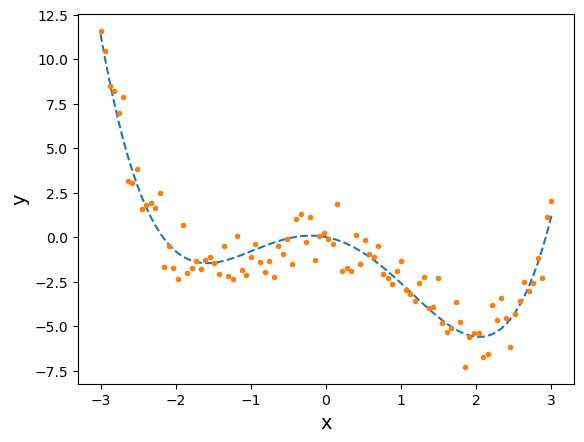

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#set a random seed for reproducibility
np.random.seed(1358) 
# generate the dataset 
x = np.linspace(-3,3, 100) 
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x)) 
# Plottting the genarated dataset 
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

In [ ]:
from sklearn.metrics import mean_squared_error

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))

result = {}

def mse_degree(degree):
    values = np.polyfit(x, y_true, degree)

    y_pred = np.polyval(values, x)

    return mean_squared_error(y, y_pred)

print(f'For degree 1: {mse_degree(1)}')
print(f'For degree 2: {mse_degree(2)}')
print(f'For degree 3: {mse_degree(3)}')
print(f'For degree 4: {mse_degree(4)}')
print(f'For degree 5: {mse_degree(5)}')

For degree 1: 6.151666926627784
For degree 2: 4.908098240734392
For degree 3: 4.574271982470261
For degree 4: 0.9721756268425575
For degree 5: 0.9721756268425598


Task 3

Compute the derivatives of the following functions using SymPy.

1. <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <msup>
    <mi>x</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <mn>2</mn>
  <mi>x</mi>
  <mo>+</mo>
  <mn>1</mn>
</math>

In [ ]:
import sympy as sp # import the sympy 
x = sp.symbols('x')
f = x**2 + 2*x + 1
y = sp.diff(f,x)
print("Derivative for (y):", y)

Derivative for (y): 2*x + 2


2. <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mn>3</mn>
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <mn>5</mn>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>3</mn>
  </msup>
</math>

In [ ]:
import sympy as sp # import the sympy 
x = sp.symbols('x')
f = (3*x - 5)**3
y = sp.diff(f,x)
print("Derivative for (y):", y)

Derivative for (y): 9*(3*x - 5)**2


3. <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msqrt>
    <mi>x</mi>
  </msqrt>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mo>&#x2212;</mo>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <mn>1</mn>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>4</mn>
  </msup>
</math>

In [ ]:
from sympy import sqrt
import sympy as sp# import the sympy 
x = sp.symbols('x')
f = ((sqrt(x) - 1) ** 2 - ((x**2 + 1) ** 4))
y = sp.diff(f,x)
print("Derivative for (y):", y)

Derivative for (y): -8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)


4. <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mn>7</mn>
  <mi>cot</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;</mo>
  <mn>8</mn>
  <msup>
    <mi>cos</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
import sympy as sp 
from sympy import tan 
from sympy import cos 
from sympy import acos
from sympy import diff
from sympy import symbols
from sympy import cot
from sympy import sin
from sympy import sec

x = symbols('x')
# Define the function 
f = (7 * cot (x)) - (8 * (acos(x)))

#Calculate the derivative 
der_f = diff(f, x)

der_f

print("Derivative for (y):", der_f)

Derivative for (y): -7*cot(x)**2 - 7 + 8/sqrt(1 - x**2)


5.

In [ ]:
from sympy import ln

x = symbols('x')

# Define the function 
f = x - ln(x) + 7 

#Calculate the derivative 
der_f = diff(f, x)

der_f

print("Derivative for (y):", der_f)

Derivative for (y): 1 - 1/x


6. 

In [ ]:
x, e = symbols('x, e')

# Define the function 
f = -10 * e**x + 5**x - 5 * x + x/5

#Calculate the derivative 
der_f = diff(f, x)

der_f

print("Derivative for (y):", der_f)


Derivative for (y): 5**x*log(5) - 10*e**x*log(e) - 24/5


7. 

In [ ]:
import sympy as sp 
from sympy import tan 
from sympy import cos 
from sympy import acos
from sympy import diff
from sympy import symbols
from sympy import cot
from sympy import sin
from sympy import sec

x = symbols('x')

# Define the function 
f =  2*sp.sin(x)/(sp.sin(x) - sp.cos(x))

#Calculate the derivative 
der_f = diff(f, x)

der_f

print("Derivative for (y):", der_f)

Derivative for (y): 2*(-sin(x) - cos(x))*sin(x)/(sin(x) - cos(x))**2 + 2*cos(x)/(sin(x) - cos(x))


8.

In [ ]:
import sympy as sp 
from sympy import tan
from sympy import atan 
from sympy import diff
from sympy import symbols
from sympy import ln

x = symbols('x')

# Define the function 
f =  x**2 * sp.ln(x)/(1 - sp.tan(x)**2)

#Calculate the derivative 
der_f = diff(f, x)

der_f

print("Derivative for (y):", der_f)

Derivative for (y): x**2*(2*tan(x)**2 + 2)*log(x)*tan(x)/(1 - tan(x)**2)**2 + 2*x*log(x)/(1 - tan(x)**2) + x/(1 - tan(x)**2)


### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
# A link to a PDF file for assignments 1-3
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/MulCalAss_234535.pdf

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here.

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

In [ ]:
# Put your code here
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-ArtjomMusaelans234535/blob/main/Deliverables/ILO7/OptAlg_234535.ipynb

###  Define function
Define the following function

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

You are tasked with finding the minimum for this function.

In [ ]:
def my_fun(x):
    # x (a scalar value): input value to your function
    
    # Output
    # y (scalar value): output of the function
    
    # Put your code here (1 line of code)
    y = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
    
    return y

### Compute the gradient of the function

To implement the Gradient Descent algorithm, you need to compute the derivative of the related function. 

Now, compute the derivative of the mathematical function

$$ f(x) = 0.3x^4 -0.1x^3 -2x^2 -0.8x$$

and implement the following function for computing the derivative of this function:

In [ ]:
def grad_fun(x):
    # x (a scalar value): input to the derivative function
    # y (output of the derivative function)
    
    # Put your code here (1 line of code)
    y = 0.3 * 4 * x**3 - 0.1 * 3 * x**2 - 2 * 2 * x - 0.8
    
    return y

### Implement Gradient Descent Update Rule

In this section, you need to implement the gradient descent update rule as follows:

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$

In [ ]:
def grad_descent_step(x, alf):
    # x (a scalar value): the current value of x
    # alf (a scalar value): learning rate
    # x_new: the new value for x
    
    # Put your code here (1 line of code)
    x_new = x - alf * grad_fun(x)
    
    return x_new

### Implement Gradient Descent Algorithm

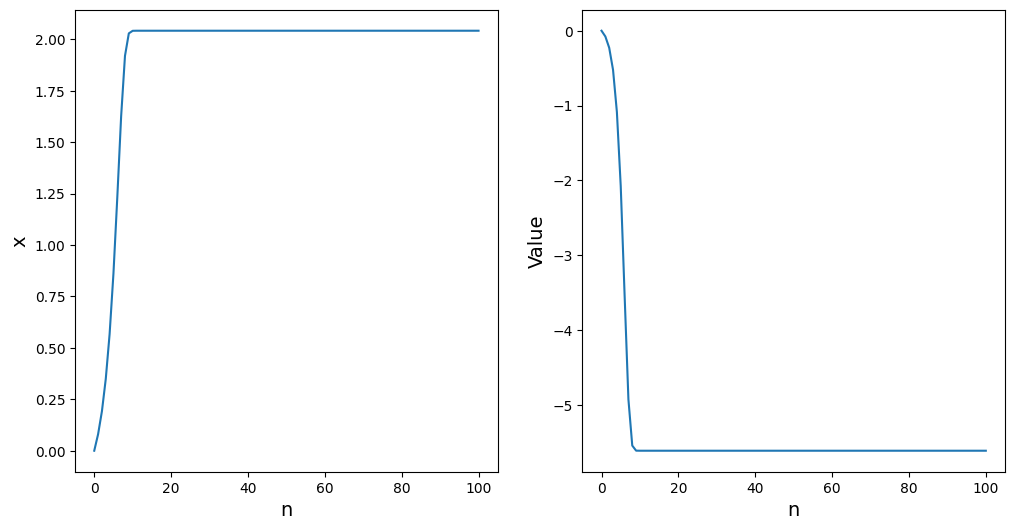

In [ ]:
from matplotlib import pyplot as plt

# Choose an initial value for x
x_init = 0

# Choose the learning rate
gam = 0.1

# Choose the number of iterations
N = 100

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

**The optimal value for x**:

In [ ]:
# Define the optimal value for x
x_opt = X[FUN_VAL.index(min(FUN_VAL))]

print("The optimal value of x is:", x_opt)

The optimal value of x is: 2.0421368657590073


**The minimum value of the function**:

In [ ]:
# Define the minimum value of the function at optimal point x_opt
min_val = my_fun(x_opt)

print("The minimum value of f is:", min_val)

The minimum value of f is: -5.608514355759727


# Assignments

## Assignment 1

Evaluate the impact of the learning rate on the convergence rate of the Gradient Descent algorithm towards the optimal solution.

Learning rate = 0.001

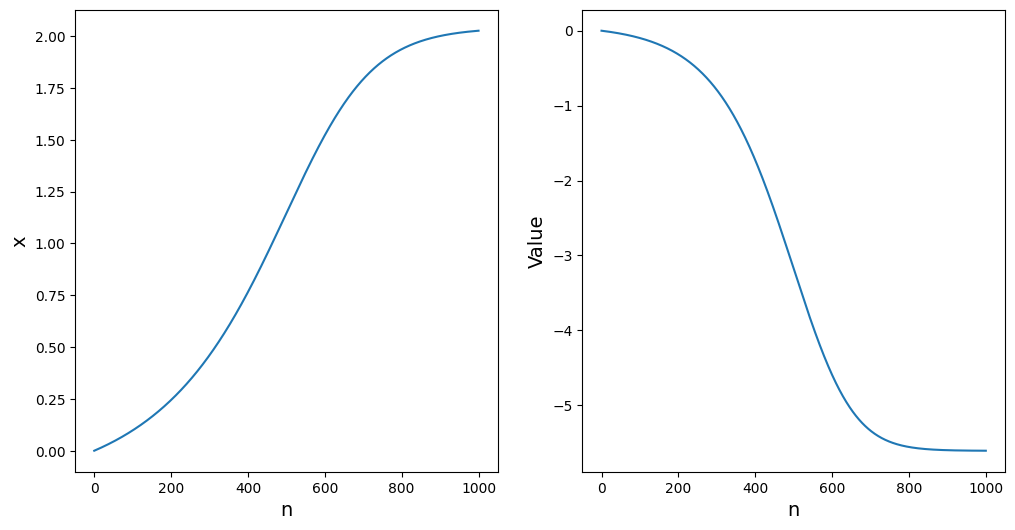

In [ ]:
# Choose an initial value for x
x_init = 0

# Choose the learning rate
gam = 0.001

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

When choosing a lower learning rate the gradient descent takes longer to get to the answer

Learning rate = 2

In [ ]:
# Choose an initial value for x
x_init = 0

# Choose the learning rate
gam = 0.9

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

NameError: name 'my_fun' is not defined

As you can see the gradient descent gives an error, so a learning rate that is to high gives an error.

Demonstrate that, depending on the initial guess 
 for the optimal solution, the Gradient Descent algorithm may result in different optimal solutions (different local minima).

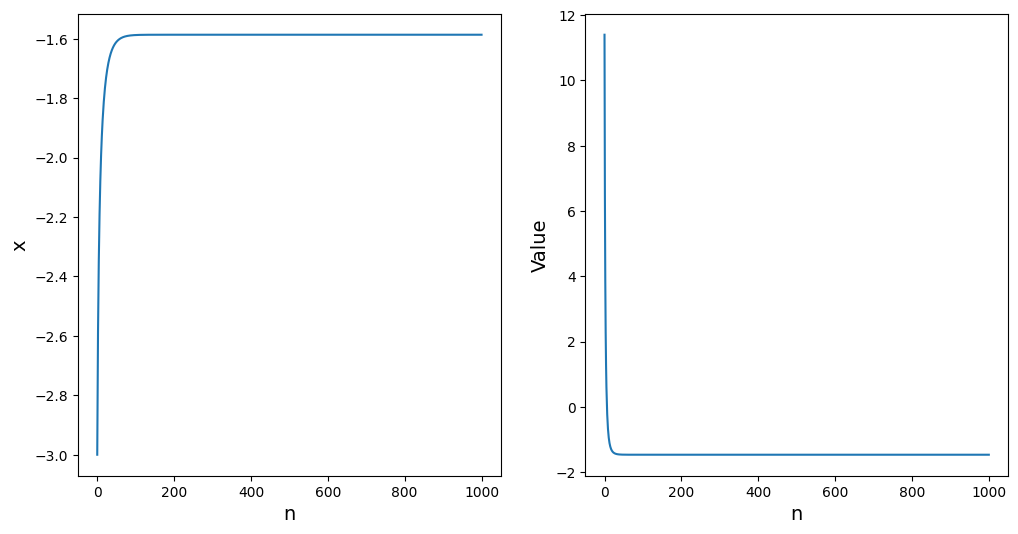

In [ ]:
# Choose an initial value for x
x_init = -3

# Choose the learning rate
gam = 0.01

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

As you can see the optimal value for x is now around -1.6 in stead of 2.04, and the minimum value is also higher. That means that the gradient descend found a local minima but not the global minima.

## Assignment 2

### Implement Gradient Descent Algorithm for House Price Prediction

This is a template for Assignment 2 of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8).

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [ ]:
# Import numpy, pandas, and matplotlib.pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("house-prices.csv")

In [ ]:
# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

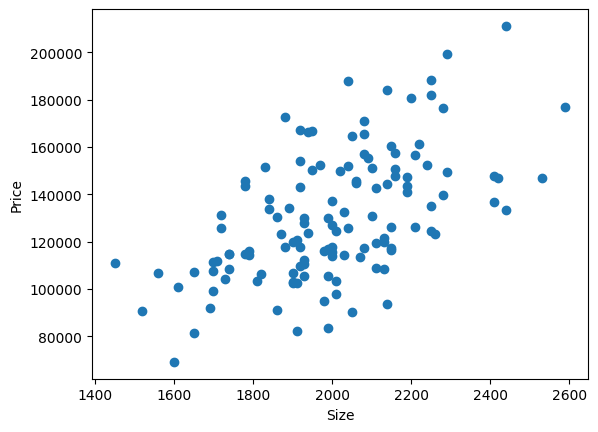

In [ ]:
# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [ ]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

y=wx+b

In [ ]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Define the linear regression model
    y = w * x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [ ]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Cost value
    
    # Initilize the sum as zero 
    J = 0**2 / (2 * m)
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use LR_model to compute the prediction of the price based on the size
        y_pred =  LR_model(x, w, b)
        
        # Compute the cost function (mean squared error cost function)
        J = J + (y_pred - y)**2 / (2 * m)
    
    return J
    

To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [ ]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438

### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [ ]:
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    
    # Number of the observations
    m = len(X)
    
    # Initilize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Compute the sums appear in the update rule
        sum_w = sum_w + alf / m * (y_pred - y) * x
        sum_b = sum_b + alf / m * (y_pred - y)
    
    # Implement the update rule for the gradien descent
    w_new = w - sum_w
    b_new = b - sum_b 
    
    return w_new, b_new

Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [ ]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

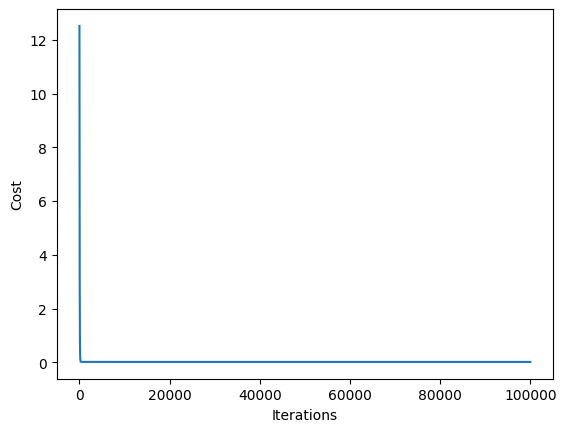

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Plot the results
fig, ax = plt.subplots()
ax.plot(range(N+1),C)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

Now, plot the obtained results:

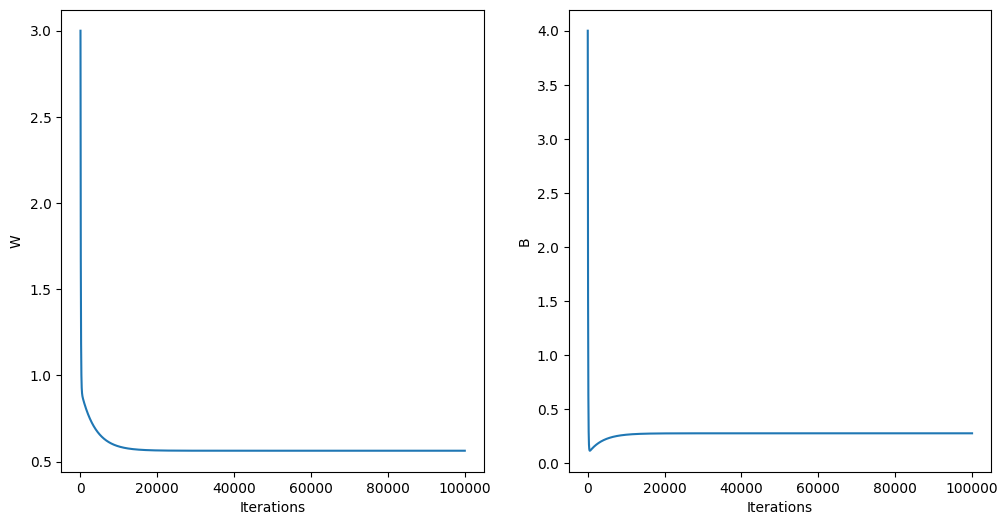

In [ ]:
# Plot the saved values of W and B against the iteration.
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(range(N+1), W)
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('W')

ax[1].plot(range(N+1), B)
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('B')

plt.show()

In [ ]:
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.5633919971910897
The optimal value for b: 0.27730447331418234


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

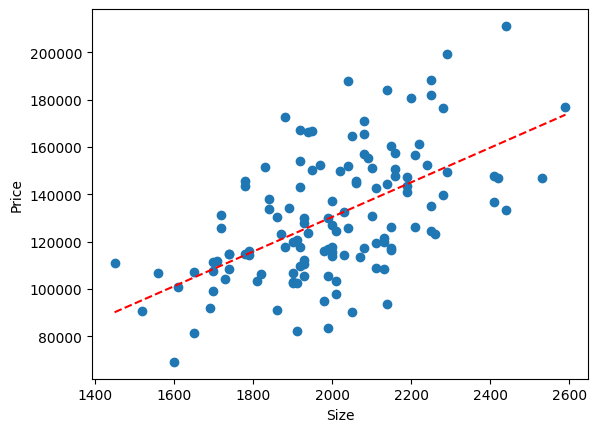

In [ ]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [ ]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [ ]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.2773044733289968


If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

Good Luck!

#### Evaluate the impact of learning rate on the obtained values for w and b

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.0001

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.8378312636862317
The optimal value for b: 0.13160276887418051


Learning rate 0.01:

The optimal value for w: 0.5633919971910897

The optimal value for b: 0.27730447331418234

Learning rate 0.0001:

The optimal value for w: 0.8378312636862317

The optimal value for b: 0.13160276887418051

As you can see the learning rate has influenced the optimal values for w and b by quite a lot.

#### Does the algorithm consistently converge to the same solution, regardless of the initial values for w and b

with values w: 6 and b: 2

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 6

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 2

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.5633919972326698
The optimal value for b: 0.2773044732921051


with values w = 3 and b = 4:

The optimal value for w: 0.5633919971910897

The optimal value for b: 0.27730447331418234

with values w = 6 and b = 2:

The optimal value for w: 0.5633919972326698

The optimal value for b: 0.2773044732921051

The optimal values differ so little from each other that it almost converges to the same solution

#### Determine the best learning rate value for training the model. Explain why you consider that value the best.

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 1

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 1 and N = 1000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 1 and N = 1000:
The optimal value for w: 0.563391997167502
The optimal value for b: 0.2773044733267066


In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 0.01 and N = 1000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 0.01 and N = 1000:
The optimal value for w: 0.8378210205024096
The optimal value for b: 0.13160706729448707


As you can see learning rate 1 is better, because it gets to the right conclusion faster. If i decide to make N = 100000 and learning rate 0.01 it also gets the right answer, but it takes longer.

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 0.01 and N = 100000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 0.01 and N = 100000:
The optimal value for w: 0.5633919971910897
The optimal value for b: 0.27730447331418234


#### Illustrate the value of the cost function versus the algorithm's iterations.

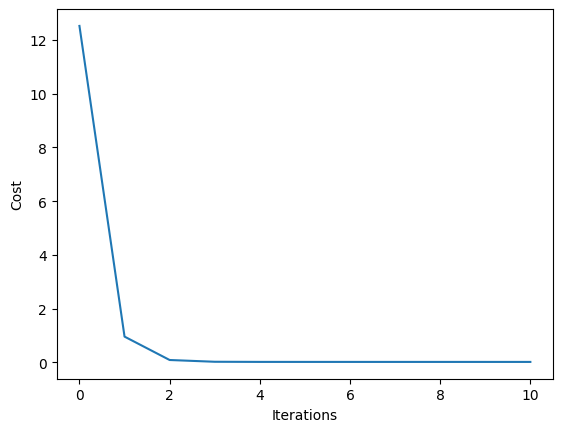

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 1

# Put your code here (1 line of code)
# Choose the number of iterations
N = 10

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

# Plot the results
fig, ax = plt.subplots()
ax.plot(range(N+1),C)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

In [ ]:
# Put your code here